**<font color="red">Комментарий от студента: \
    Привет, Вячеслав! Рад знакомству. Конечно давай общаться на ты. Учту все ошибки и предложения в работе.</font>**

# Анализ успешности игр в интернет магазине «Стримчик»

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Перед нами данные о продажах в интернет-магазине «Стримчик», нам необходимо:
1. Подготовить данные к анализу:
    - Заменить названия столбцов (приведите к нижнему регистру);
    - Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
    - Обработать пропуски при необходимости:
        - Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
        - Описать причины, которые могли привести к пропускам;
        - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и опишите, как его обработать;
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
2. Провести исследовательский анализ данных, а именно:
    - Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - После проведения анализа, не учитывать в работе данные за предыдущие годы.
    - Выяснить какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
    - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
    - Соотнести выводы с продажами игр на других платформах.
    - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
3. Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Описать различия в долях продаж.
    - Самые популярные жанры (топ-5). Пояснить разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
4. Проверить следующие гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    Самостоятельно задайте  пороговое значение alpha.
    Пояснить:
    - Как вы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.
5. Написать общий вывод.

### Откройте файл с данными и изучите общую информацию. 

Для визуализации нулевых значений нам нужен pip missingno

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from math import sqrt
import plotly.express as px
from scipy.stats import binom, poisson
from math import factorial
import missingno as msno

Откроем массив данных.

In [3]:
try:
    data = pd.read_csv('C:/Users/almuc/Downloads/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице для анализа 16715 строк и 11 столбцов.

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В представленном источнике данных для анализа у нас 16715 строк и 11 столбцов. Данные предоставлены за период с 1980 года по 2016 года. Указано название игры, год релиза и платформа. В таблице также представлены данные о продажах игр на Северо-Американском рынке, Европейском, Японском и остальные продажи выделены в отдельную графу "Прочие продажи". Также имеются данные о оценках критиков и пользователей.

### Подготовьте данные.

Выведем на экран название всех столбцов

In [7]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем названия столбцов к нижнему регистру.

In [8]:
data.columns = map(str.lower, data.columns)

Проверяем полученные данные.

In [9]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверяем типы данных

In [10]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Необходимо сменить следующие типы данных:**
1. year_of_release - int32
2. critic_score - int.0
2. user_score  - float64

Изменение типа столбцов year_of_release и critic_score необходимо, т.к. у нас это год релиза и оценка критиков по стобальной шкале, кроме целого числа  ничего использоваться не будет.\
Столбец user_score привести к формату float64, т.к. это столбец оценка пользователей, она оценивается по десятибальной шкале.

In [11]:
data['year_of_release'] =  data['year_of_release'].astype('Int32')

In [12]:
data['critic_score'] =  data['critic_score'].astype('Int32')

Проверим уникальные значения в столбце user_score (оценка пользователей), т.к. формат значений object

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Tbd рейтинг — это показатель, который используется для оценки качества и достоверности информации или товаров на различных платформах. Термин «tbd» является аббревиатурой от английской фразы «to be determined», что в переводе означает «будет определено».
Источник: https://mentona.ru/tbd-reiting-cto-eto-i-kak-ego-ispolzovatАббервиатура "

Это означает, что недостаточно данных для установки рейтинга, поэтому заменим 'tbd' на "nan".

In [14]:
data['user_score'] = data['user_score'].str.replace('tbd', 'nan').replace(regex=True)

In [15]:
data['user_score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', 'nan', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

И приведем значения столбца user_score в формат float64

In [16]:
data['user_score'] =  data['user_score'].astype('float64')

Проверим, что получилось.

In [17]:
data.dtypes

name                object
platform            object
year_of_release      Int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int32
user_score         float64
rating              object
dtype: object

**Считаем количество пропущенных значений**

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         4406
rating             6766
dtype: int64

In [19]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,26.400000


<AxesSubplot:>

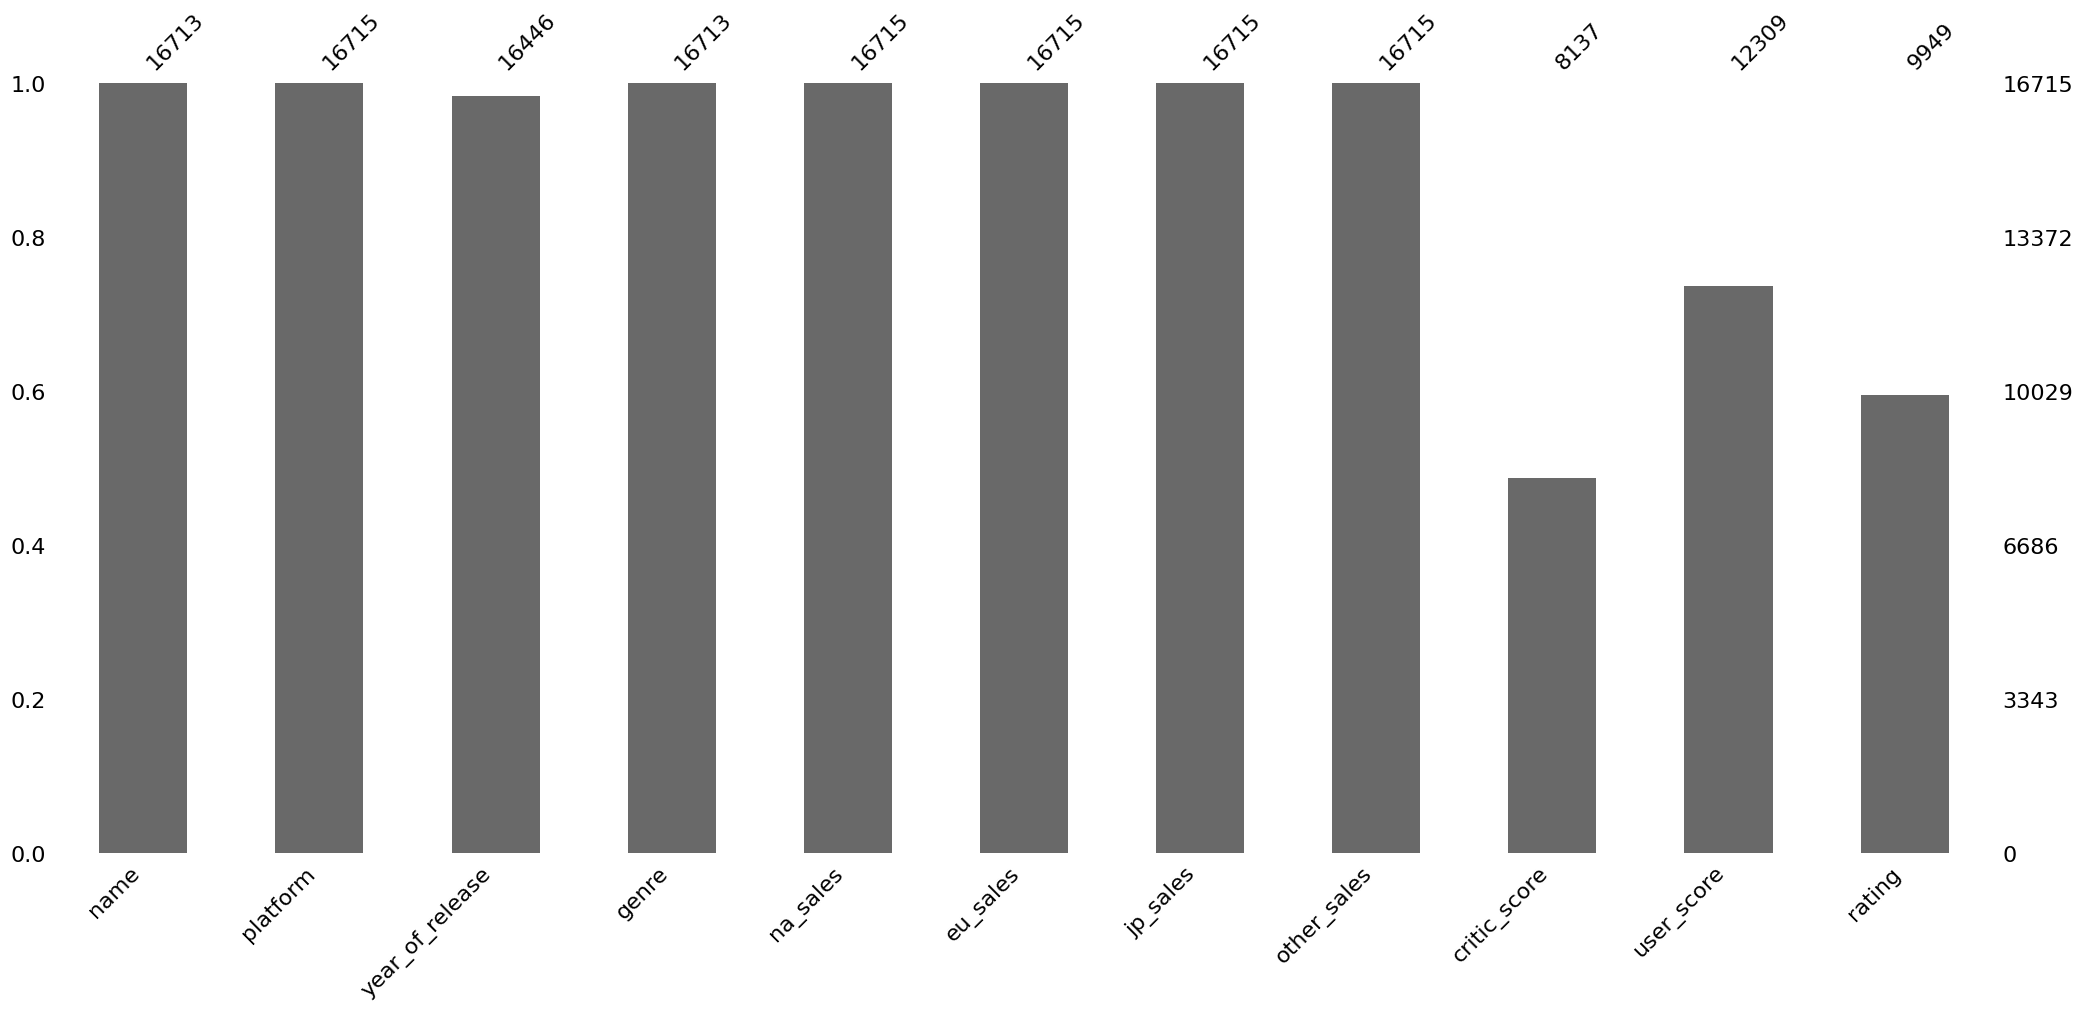

In [20]:
msno.bar(data)

**Определяем, в каких столбцах есть пропуски.**\
Количество обнаруженных пропусков в 16715 строках. Пропуски обнаружены в следующих столбцах:

2 пропуска в name - название мы не сможем установить, эти данные стоит удалить.

2 пропуска в genre - если есть название игры, то жанр можно установить.

269 пропусков в year_of_release - год релиза можно восстановить, по названию игры, но т.к. это составляет 1,6 % от общей массы, то такие данные стоит удалить.

8578 пропусков в critic_score - вероятно недостаточно данных для оценки критиков, поэтому данные оставляем.

4406 пропусков в user_score - вероятно недостаточно данных для оценки пользователей, поэтому данные оставляем.

6766 пропусков в rating - думаю в данном случае не был проставлен при заполнении, данные оставляем.

Выведем пустые значения столбца genre.

In [21]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,4.9,NaN


Мы видим, что пустые значения в столбцах genre и name совпадают. Поэтому данные удалим.

In [22]:
data = data.dropna(subset = ['name'])

По столбцу year_of_release мы решили удалить пропущенные значения, т.к. 1,6 % не повлияют на нашу выборку.

In [23]:
data = data.dropna(subset = ['year_of_release'])

Проверяем полученные данные

In [24]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         4328
rating             6676
dtype: int64

Посчитаем наличие дубликатов.

In [25]:
print('Количество явных дубликатов', data.duplicated().sum())

Количество явных дубликатов 0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int32  
 9   user_score       12116 non-null  float64
 10  rating           9768 non-null   object 
dtypes: Int32(2), float64(5), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [27]:
data['general_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [28]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,8.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,8.0,NaN,31.38


    При подготовке данных мы провели следующие действия:
1. Привели названия столбцов к нижнему регистру,
2. Привели столбцы year_of_release и critic_score к формату int64,
3. Увидели в столбце user_score рейтинг tbd, что означает недостаточно данных для установки рейтинга, поэтому заменим 'tbd' на "nan". И привели этот столбец к формату float64
4. Удалили пропуски в столбцах name и genre
5. Проверили наличие полных дубликатов,
6. Добавили столбец сумарными продажами по всем регионам.
    Пропуски в столбцах name и genre думаю образовались только из-за человеческого фактова. В столбцах с оценками critic_score и user_score по причине недостачточного количества оценок пользователей. А в столбце rating вероятно тоже пропуски из-за того, что данный рейтинг был запущен в 1994 году и не все игры прошли оценку  ассоциацией Interactive Digital Software Association. Да и сама оценка носит добровольный характер.

### Проведите исследовательский анализ данных

**Сколько игр выпускалось в разные годы.**

Построим сводную таблицу с количеством выпущенных игр по годам.

In [29]:
data_year = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
data_year.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


Переименуем столбец 

In [30]:
data_year.columns = ['count_games']
data_year

,count_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим график выхода игр по количеству.

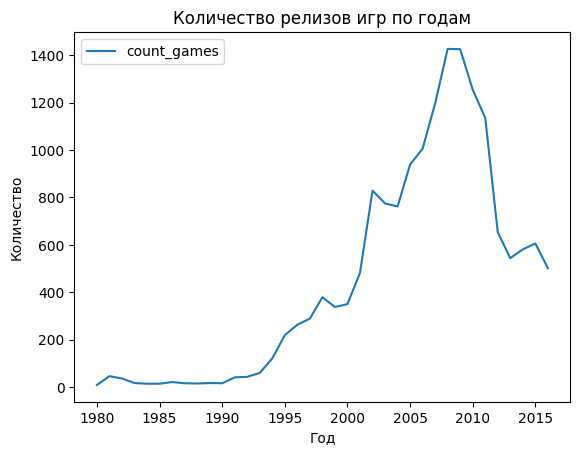

In [31]:
data_year.plot()
plt.title("Количество релизов игр по годам")
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

На мой взгляд до 1994 года выпускалось совсем не много игр, после 1994 года произошел резкий скачок в росте, когда выпускалось каждый год игр больше, чем в предъыдущий практически в 2 раза. Этот скачок продился до 1996 года. Затем произошел не такой сильный рост, он длился до 2000 года. В 2000 году начался бум на релиз новых игр, он длился до 2011 года. Затем произошел спад в выпуске новых игр.

Думаю это связано с следующим:
1. до 1994 г. не было устройств для игр, и стоили они не дешево, из-за чего многие не могли себе позволить купить себе приставку.
2. В 1995 г. выпустили PS1, что и запустило новую ветку игр.
3. в 2000 году была выпущена PS2, что было прорывом в индустрии игр, а в 2005 году была выпущена X360, что добавило еще ажиотажа в выходе игр.
4. в 2012-2013 годах было закрыто производство PS2 и X360. Думаю это связано с устареванием моделей. Замены конечно выпущены - это PS3 и XOne, а также выход новой игровой консоли PS5.
5. выход игр сейчас стабилизировался, на уровне от 550 до 650 игр в год, думаю это связано с требованием рынка.

Думаю стоит убрать период до 2013 года, т.к. в этот год были выпущены новые игровый платформы PS3 и XOne, а также выход новой игровой консоли PS5.

**Как менялись продажи по платформам.**

Построим сводную таблицу с количеством продаж по платформам.

In [32]:
data_platform = pd.pivot_table(data, index='platform', values='general_sales', aggfunc='sum')
data_platform = data_platform.sort_values('general_sales',ascending=False)
data_platform

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Визиализируем данные.

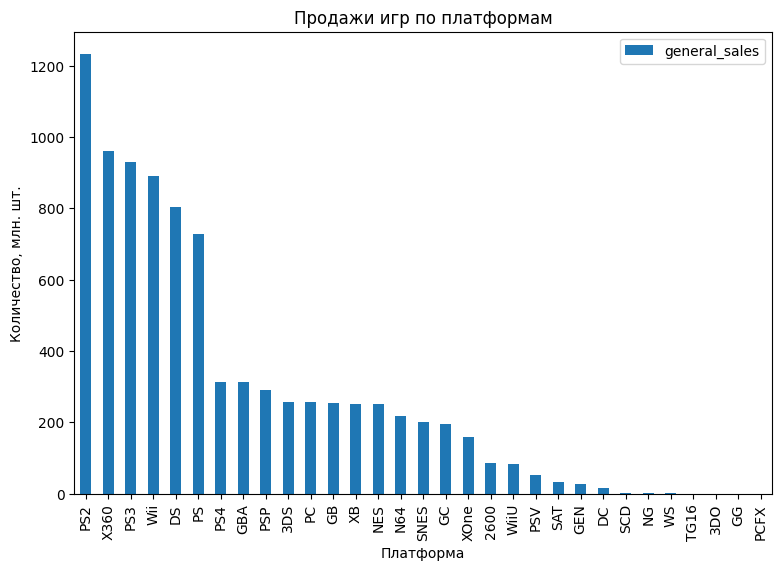

In [33]:
data_platform.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по платформам")
plt.xlabel('Платформа')
plt.ylabel('Количество, млн. шт.')
plt.show()

Как я описывал ранее PS2 является абсолютным лидером по количеству проданных игр, она вышла в 2002 году. X360 занял 2 место в рейтинге, думаю это связано с тем, что PS2 вышел раньше и большинство уже купило и привыкло в PS2. PS 3 занял 3 место, думаю это был переход пользователей с PS2 на PS3.

**Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.**

Для анализа возьмем первые 6 платформ, т.к. 6 место более чем в 2 раза больше 7.

In [34]:
top_platform = list(data_platform.index[:6])
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

В нашем рейтинге остались игры платформ PlayStation, XBox, Nintendo.

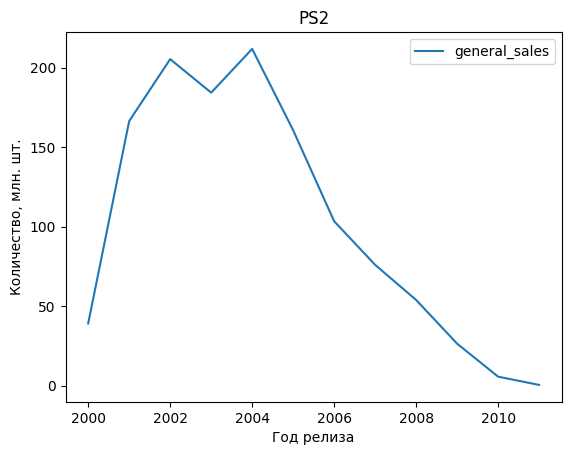

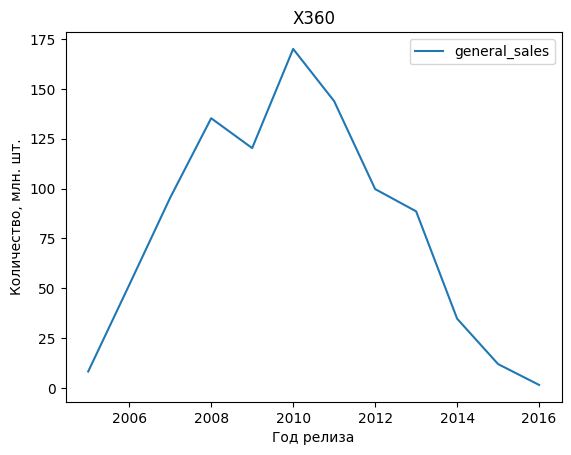

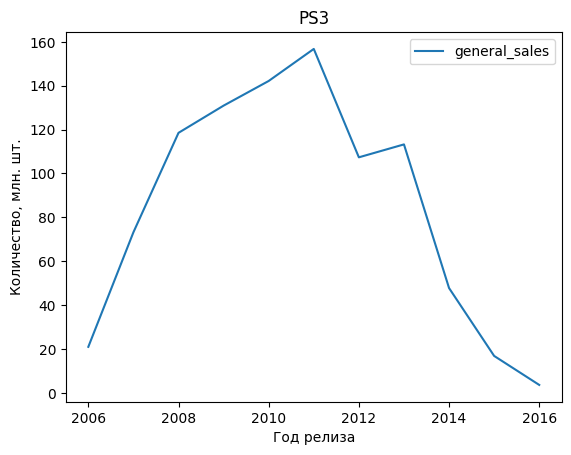

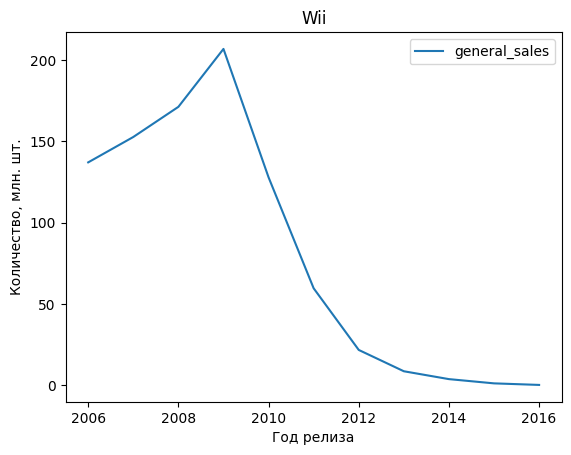

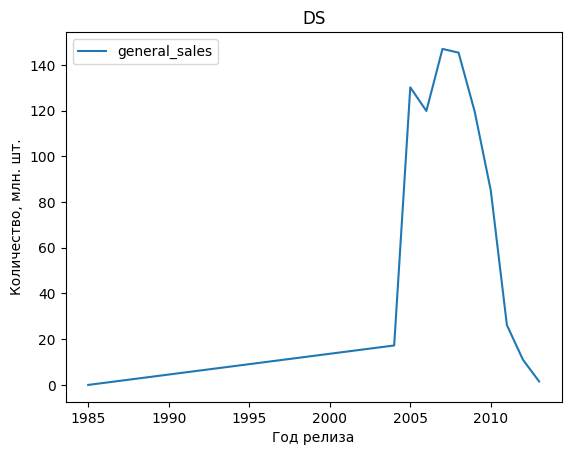

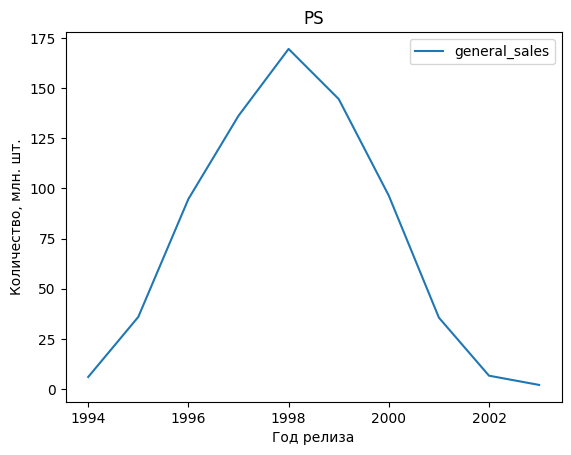

In [35]:
for platform in top_platform:
    platform_sales = pd.pivot_table(data.query('platform == @platform'), index=['year_of_release'], values='general_sales', aggfunc='sum')
    platform_sales.plot();
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Количество, млн. шт.')

График на Nintendo DS показывает первый релиз игры в 1985 году, что является ошибкой, т.к. платформа вышла в 2004 году. Посмотрим что это за игры.

In [36]:
Nintendo_DS = data.loc[(data['platform'] == "DS") & (data['year_of_release'] < 2004)]
Nintendo_DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,8.0,NaN,0.02


Такую игру с таким годом выпуска действительно выпускали, во ссылка  https://arcadetemple.com/strongest-tokyo-university-shogi-ds-sales-numbers/. Но это игра на другую консоль. Поэтому удалим строку.

In [37]:
data = data.drop(15957)

Построим заново графики продаж по топовым играм.

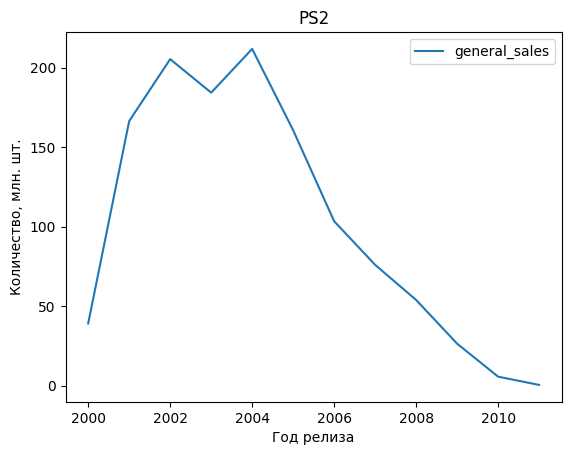

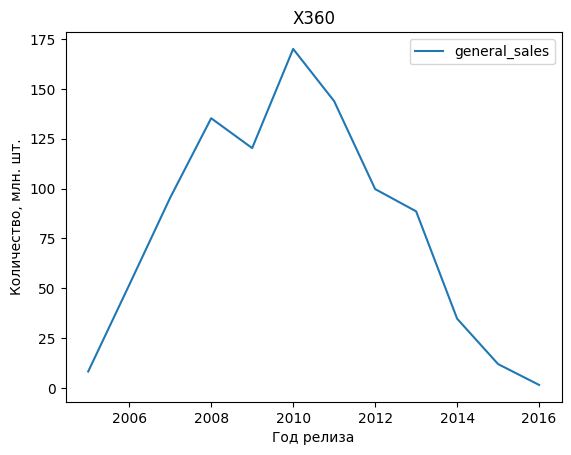

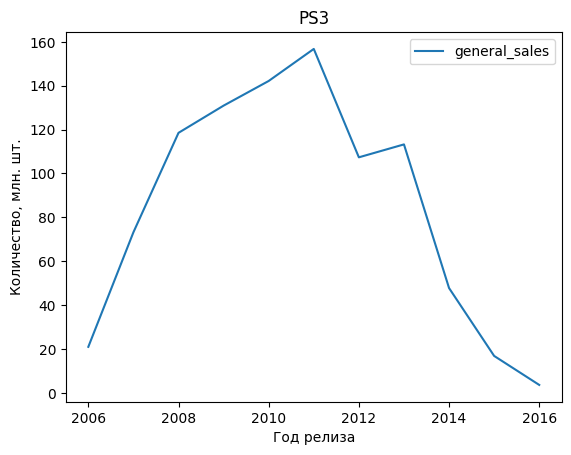

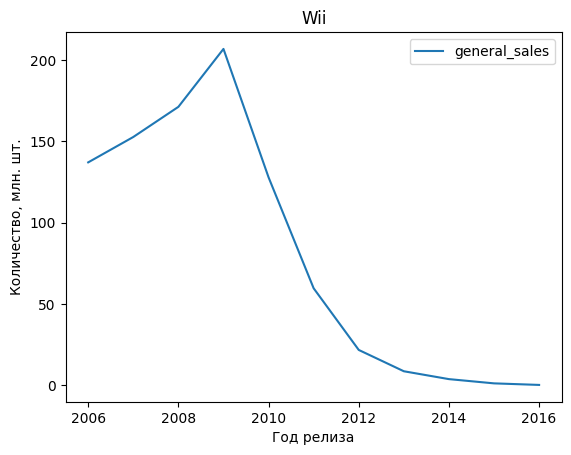

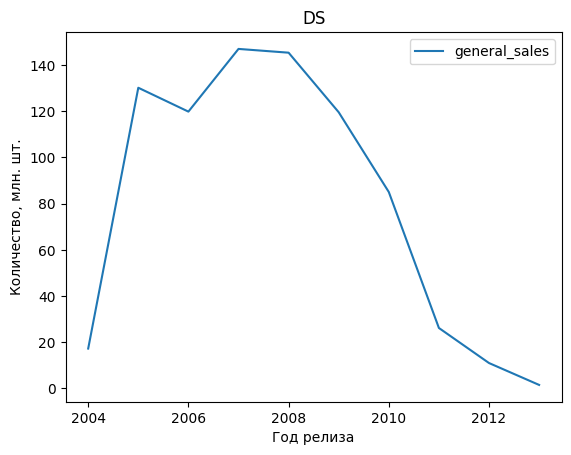

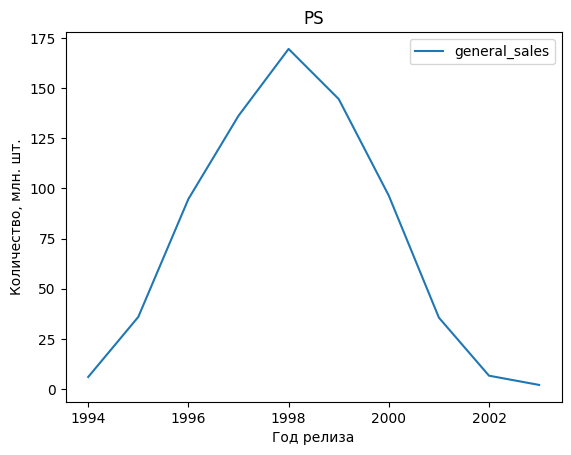

In [38]:
for platform in top_platform:
    platform_sales = pd.pivot_table(data.query('platform == @platform'), index=['year_of_release'], values='general_sales', aggfunc='sum')
    platform_sales.plot();
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Количество, млн. шт.')

На основании построенных графиков можно сделать следующие выводы:
1. Игры на платформу PS2 начали выходить в 2000 году, игра имела успех наибольший пик продаж был с 2001 по 2005 годы, после 2004 года наблюдается спад. Это связано с выходом новой игровой платформы. Игры на PS2 выпускались до 2012 года.
2. Игры на платформу X360 начали выходить в 2005 году наблюдается рост до 2010 года, после спад релизов новых игр. 
3. Игры на платформу PS3 начали выходить в 2006 году наблюдается рост до 2011 года, после спад релизов новых игр. 
4. Игры на платформу Nintendo Wii начали выходить в 2006 году, причем продажи сразу достигли около 140 млн. копий наблюдается рост до 2010 года, после идет резкий спад релизов новых игр. 
5. Игры на платформу Nintendo DS начали выходить в 2004 году наблюдается рост до 2009 года, после спад релизов новых игр. Перестали выпускать игры в 2013 году. 
6. Игры на платформу PS начали выходить в 1994 году наблюдается рост до 1988 года, после спад релизов новых игр. Перестали выпускать игры в 2003 году.

В целом по графикам можно сделать вывод, что игры выходят на рынок, их покупают, а спустя 4-5 лет выходит новая платформа, но так как поддержка работает, то спад наблюдается плавный.

На сегодняешнее время основными продавцами на рынке консолей являются SonyPlaystation и XBox. Nintendo выпускает портативные консоли. Поэтому построим графики выхода и продаж игр по консолям SonyPlaystation и XBox

**SonyPlaystation**

In [39]:
sony_platform = ['PS', 'PS2', 'PS3', 'PS4', 'PSV']
sony_platform

['PS', 'PS2', 'PS3', 'PS4', 'PSV']

In [40]:
sony_salles = pd.DataFrame(data.query('platform in @sony_platform'))
sony_salles = sony_salles.groupby(['platform', 'year_of_release'])[['general_sales']].sum()
sony_salles

general_sales
platform year_of_release               
PS       1994                      6.03
         1995                     35.96
         1996                     94.70
         1997                    136.17
         1998                    169.49
         1999                    144.53
         2000                     96.37
         2001                     35.59
         2002                      6.67
         2003                      2.07
PS2      2000                     39.17
         2001                    166.43
         2002                    205.38
         2003                    184.31
         2004                    211.81
         2005                    160.66
         2006                    103.42
         2007                     75.99
         2008                     53.90
         2009                     26.40
         2010                      5.64
         2011                      0.45
PS3      2006                     20.96
         2007                     73.19
         2008                    118.52
         2009                    130.93
         2010                    142.17
         2011                    156.78
         2012                    107.36
         2013                    113.25
         2014                     47.76
         2015                     16.82
         2016                      3.60
PS4      2013                     25.99
         2014                    100.00
         2015                    118.90
         2016                     69.25
PSV      2011                      4.63
         2012                     16.19
         2013                     10.59
         2014                     11.90
         2015                      6.25
         2016                      4.25

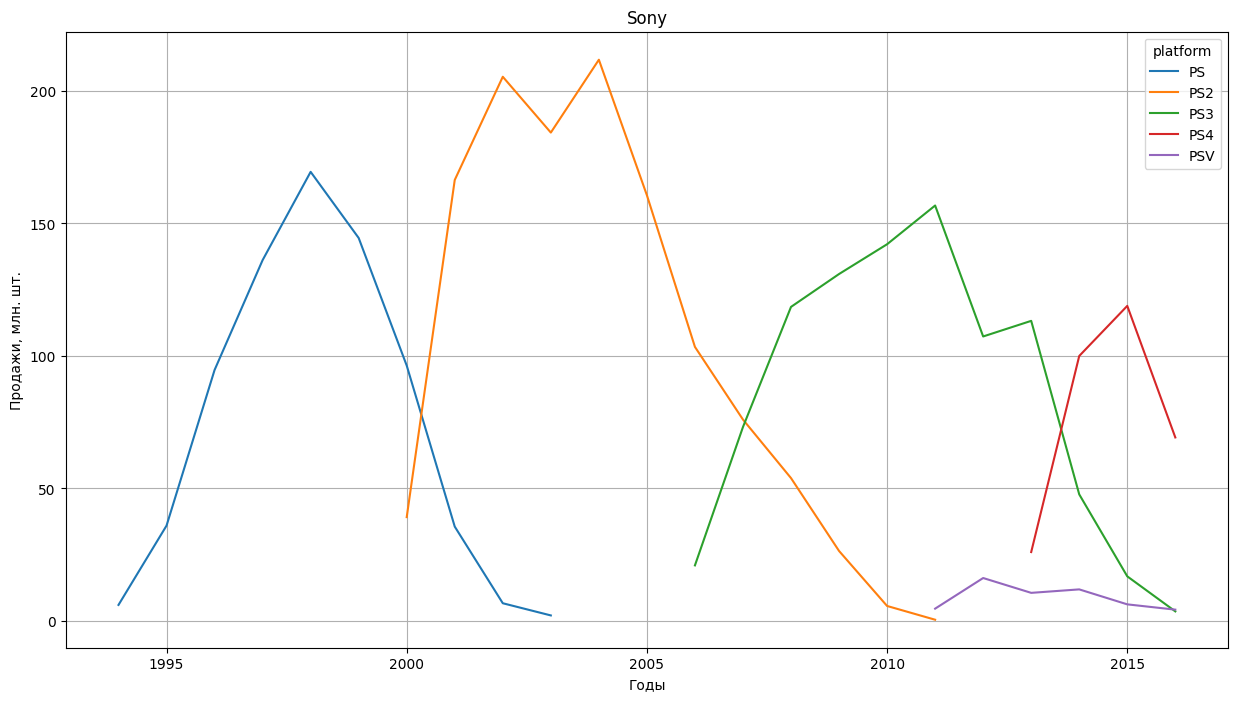

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Sony')
ax.grid()
ax.set_xlabel('Годы')
ax.set_ylabel('Продажи, млн. шт.')
sns.lineplot(x='year_of_release',y='general_sales', hue='platform', data=sony_salles.reset_index())
plt.show()

    Как мы видим выход новых платформ Sony проиходит раз в 6 лет.Выход новой платформы ознаменует скорое прекращение релизов старой модели. Что на мой взгляд логично, т.к. технологии меняются и нет смысла делать новые игры на старые платформы. Продажи новых консолей должны увеличиваться.

**XBox**

In [42]:
xbox_platform = ['X360', 'XB', 'XOne']
xbox_platform

['X360', 'XB', 'XOne']

In [43]:
xbox_salles = pd.DataFrame(data.query('platform in @xbox_platform'))
xbox_salles = xbox_salles.groupby(['platform', 'year_of_release'])[['general_sales']].sum()
xbox_salles

general_sales
platform year_of_release               
X360     2005                      8.25
         2006                     51.62
         2007                     95.41
         2008                    135.26
         2009                    120.29
         2010                    170.03
         2011                    143.84
         2012                     99.74
         2013                     88.58
         2014                     34.74
         2015                     11.96
         2016                      1.52
XB       2000                      0.99
         2001                     22.26
         2002                     48.01
         2003                     55.04
         2004                     65.42
         2005                     49.08
         2006                     10.04
         2007                      0.55
         2008                      0.18
XOne     2013                     18.96
         2014                     54.07
         2015                     60.14
         2016                     26.15

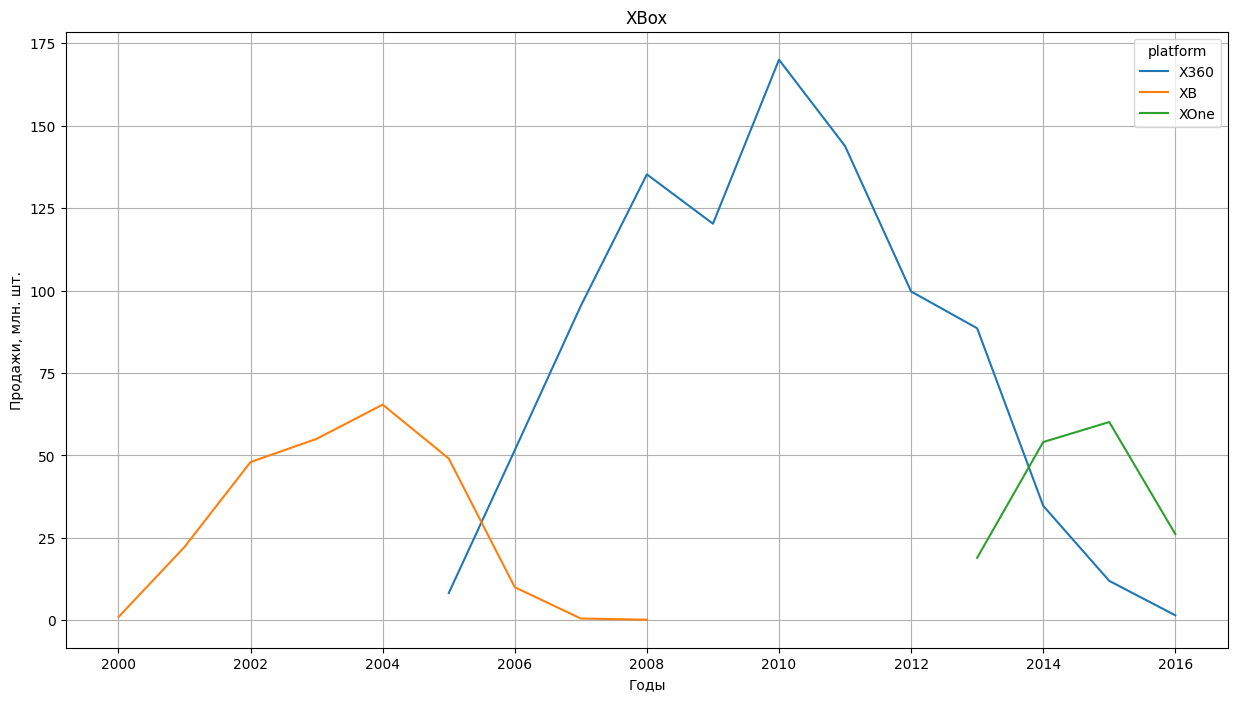

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('XBox')
ax.grid()
ax.set_xlabel('Годы')
ax.set_ylabel('Продажи, млн. шт.')
sns.lineplot(x='year_of_release',y='general_sales', hue='platform', data=xbox_salles.reset_index())
plt.show()

    Выход новых платформ корпорации Microsoft происходлит не так часто как Sony, сначала прошло 5 лет с момента релиза, затем 8. Как выидим X360 была наиболее популярной игровой консолью.

**Актуальный период для прогнозирования новых игр.**

На мой взгляд актуальный период для прогнозирования продаж стоит брать с 2013 года. В этот год вышли в продажу новые игровые консоли PS4 и XOne. С учетом приведенных выше графиков, если тенденция продолжится, то эти игровые консоли будут иметь наибольший успех в продажах на ближайшие годы.

In [45]:
current_period_data = data[data['year_of_release'] > 2013]
current_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,3.4,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,7.8,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,7.6,NaN,7.98


**Какие платформы лидируют по продажам, растут или падают?**

Сделаем своднуюю по выбранному периоду и постороим график продаж.

In [46]:
current_period_sales = pd.pivot_table(current_period_data, index='platform', values='general_sales', aggfunc='sum')
current_period_sales = current_period_sales.sort_values('general_sales',ascending=False)
current_period_sales

,general_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


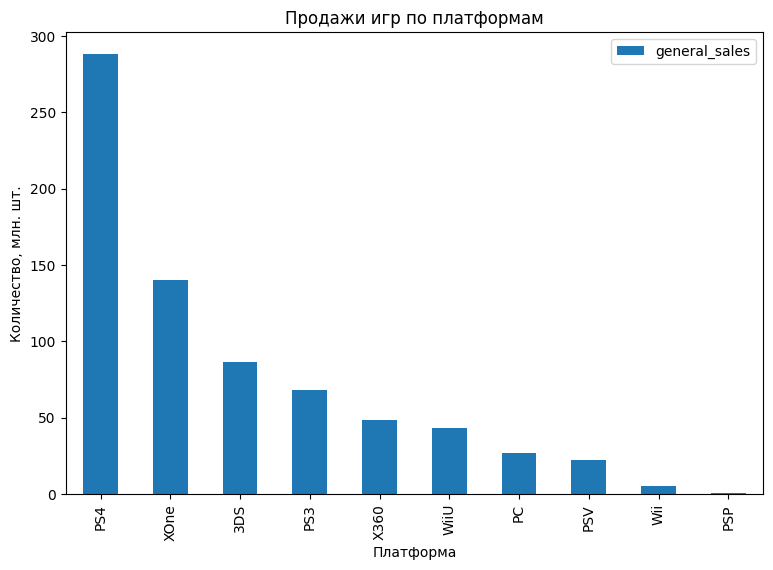

In [47]:
current_period_sales.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по платформам")
plt.xlabel('Платформа')
plt.ylabel('Количество, млн. шт.')
plt.show()

И построим сводную с разбивкой по годам.

In [48]:
current_period_values = pd.pivot_table(current_period_data, index=['platform','year_of_release'], 
                                     values='general_sales', aggfunc = 'sum')
current_period_values 

general_sales
platform year_of_release               
3DS      2014                     43.76
         2015                     27.78
         2016                     15.14
PC       2014                     13.28
         2015                      8.52
         2016                      5.25
PS3      2014                     47.76
         2015                     16.82
         2016                      3.60
PS4      2014                    100.00
         2015                    118.90
         2016                     69.25
PSP      2014                      0.24
         2015                      0.12
PSV      2014                     11.90
         2015                      6.25
         2016                      4.25
Wii      2014                      3.75
         2015                      1.14
         2016                      0.18
WiiU     2014                     22.03
         2015                     16.35
         2016                      4.60
X360     2014                     34.74
         2015                     11.96
         2016                      1.52
XOne     2014                     54.07
         2015                     60.14
         2016                     26.15

Построим график выхода игр по всем платформам.

In [49]:
full_data = data.groupby(['platform', 'year_of_release'])[['general_sales']].sum()
full_data

general_sales
platform year_of_release               
2600     1980                     11.38
         1981                     35.68
         1982                     28.88
         1983                      5.84
         1984                      0.27
...                                 ...
XB       2008                      0.18
XOne     2013                     18.96
         2014                     54.07
         2015                     60.14
         2016                     26.15

[237 rows x 1 columns]

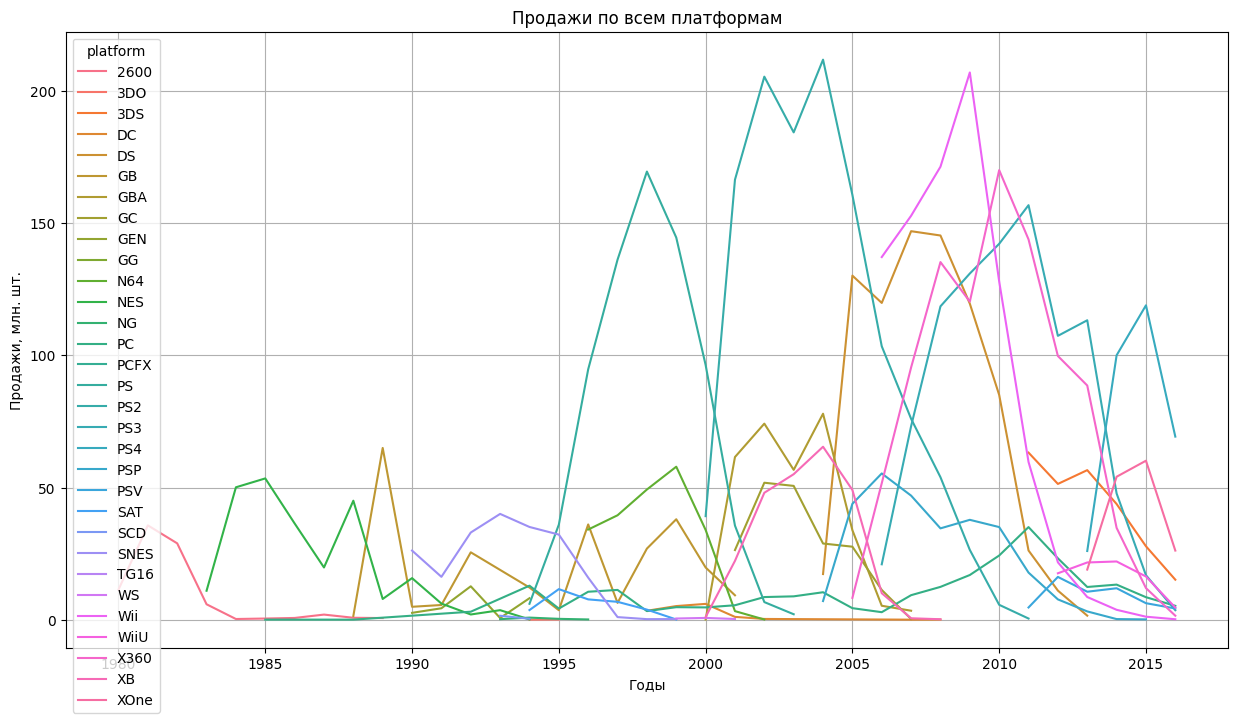

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Продажи по всем платформам')
ax.grid()
ax.set_xlabel('Годы')
ax.set_ylabel('Продажи, млн. шт.')
sns.lineplot(x='year_of_release',y='general_sales', hue='platform', data=full_data.reset_index())
plt.show()

Думаю такой график не очень подходит для чтения, поэтому сделаю только по лидерам, т.е. по Sony и Microsofte.

In [51]:
selection_platform = ['X360', 'XB', 'XOne', 'PS', 'PS2', 'PS3', 'PS4', 'PSV']
selection_data = pd.DataFrame(data.query('platform in @selection_platform'))
selection_data = selection_data.groupby(['platform', 'year_of_release'])[['general_sales']].sum()
selection_data

general_sales
platform year_of_release               
PS       1994                      6.03
         1995                     35.96
         1996                     94.70
         1997                    136.17
         1998                    169.49
...                                 ...
XB       2008                      0.18
XOne     2013                     18.96
         2014                     54.07
         2015                     60.14
         2016                     26.15

[68 rows x 1 columns]

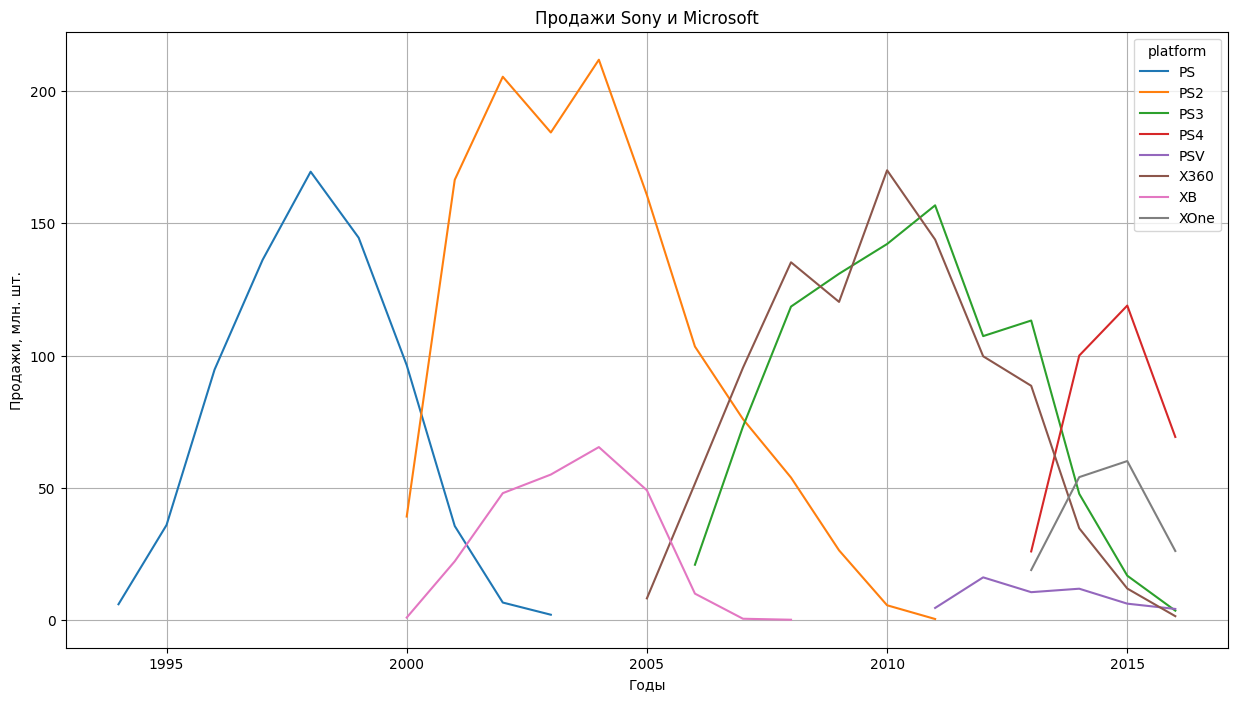

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Продажи Sony и Microsoft')
ax.grid()
ax.set_xlabel('Годы')
ax.set_ylabel('Продажи, млн. шт.')
sns.lineplot(x='year_of_release',y='general_sales', hue='platform', data=selection_data.reset_index())
plt.show()

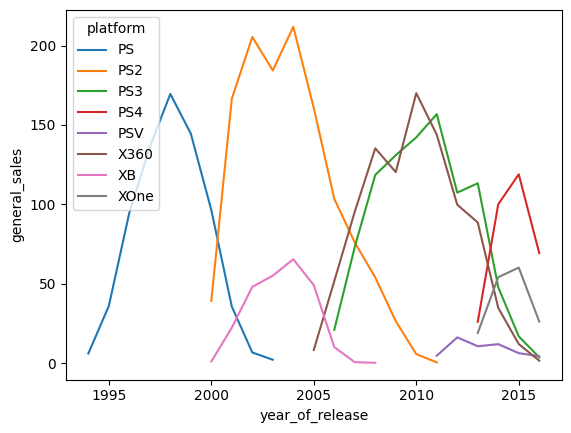

In [53]:
sns.lineplot(x='year_of_release',y='general_sales', hue='platform', data=selection_data.reset_index())
plt.show()

Действительно, отлично наблюдается тенденция продаж, особо хорошо видно лидера в прошлом PS2, в то же время как продажи на PS3 и X360 практически совпадают. Продажи новых консолей пока набирают обороты.

Лидером по продажам за актуальный период является PS4, 2 место занимает XOne, несмотря на то, что продажи почти в 2 раза меньше чем у PS4.  Третье место по продажам за актуальный период занимает Nintendo 3DS.  Это портативная консоль, а конкуренты такие как PSP, PSV, WiiU имееют горазды меньшие продажи, поэтому считаю платформу прибыльной. На всех, без исключений, платформах мы видим спад продаж. 

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

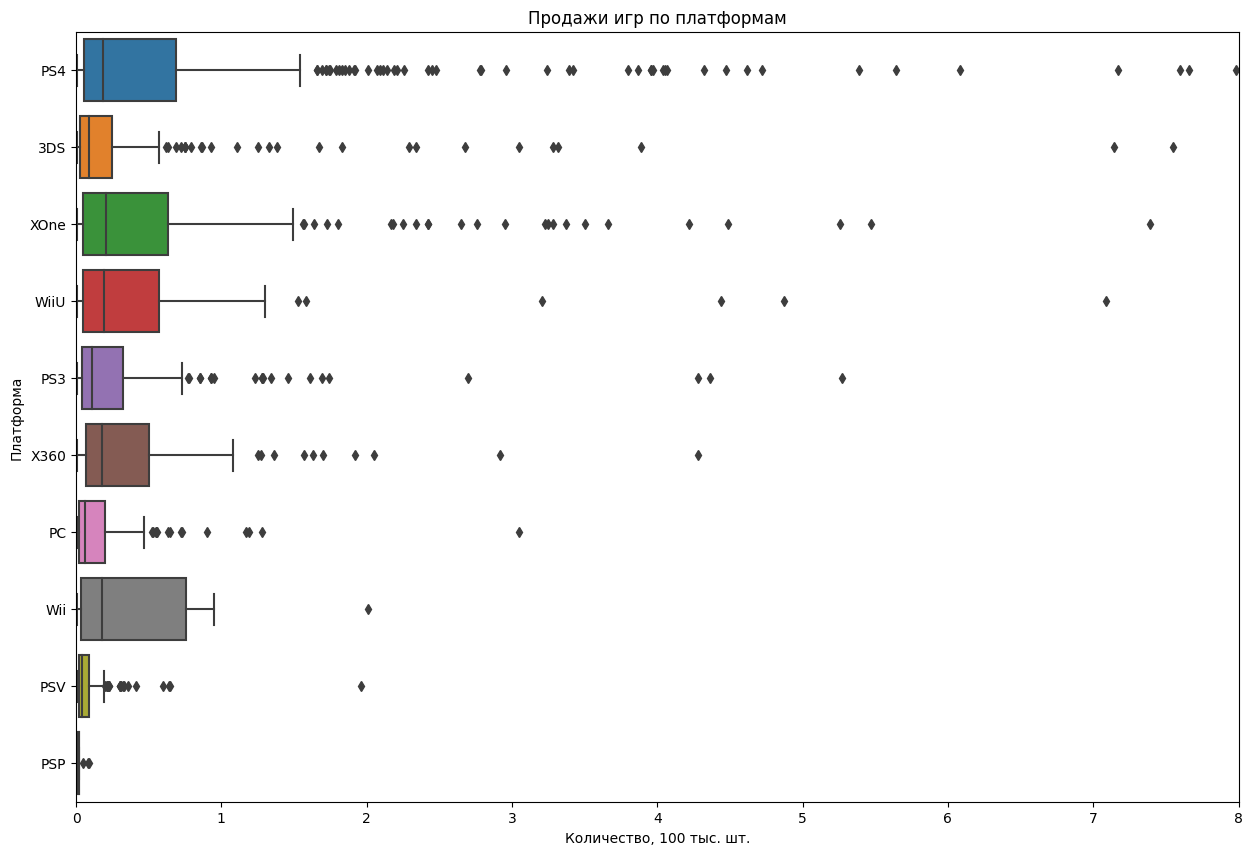

In [54]:
plt.figure(figsize=(15,10))
sns.boxplot(x="general_sales", y="platform", data=current_period_data.reset_index())
plt.title("Продажи игр по платформам")
plt.ylabel('Платформа')
plt.xlabel('Количество, 100 тыс. шт.')
plt.xlim(0,8)
plt.show()

In [55]:
current_period_data['general_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: general_sales, dtype: float64

По графику можно понять, что абсолютным лидером по продажам является PS4, на втором месте XOne. 

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами по наиболее популярным платформам:
- PS3
- PS4
- XOne
- 3DS

**PS3**

,general_sales,critic_score,user_score
general_sales,1.000000,0.446575,-0.159647
critic_score,0.446575,1.000000,0.693445
user_score,-0.159647,0.693445,1.000000


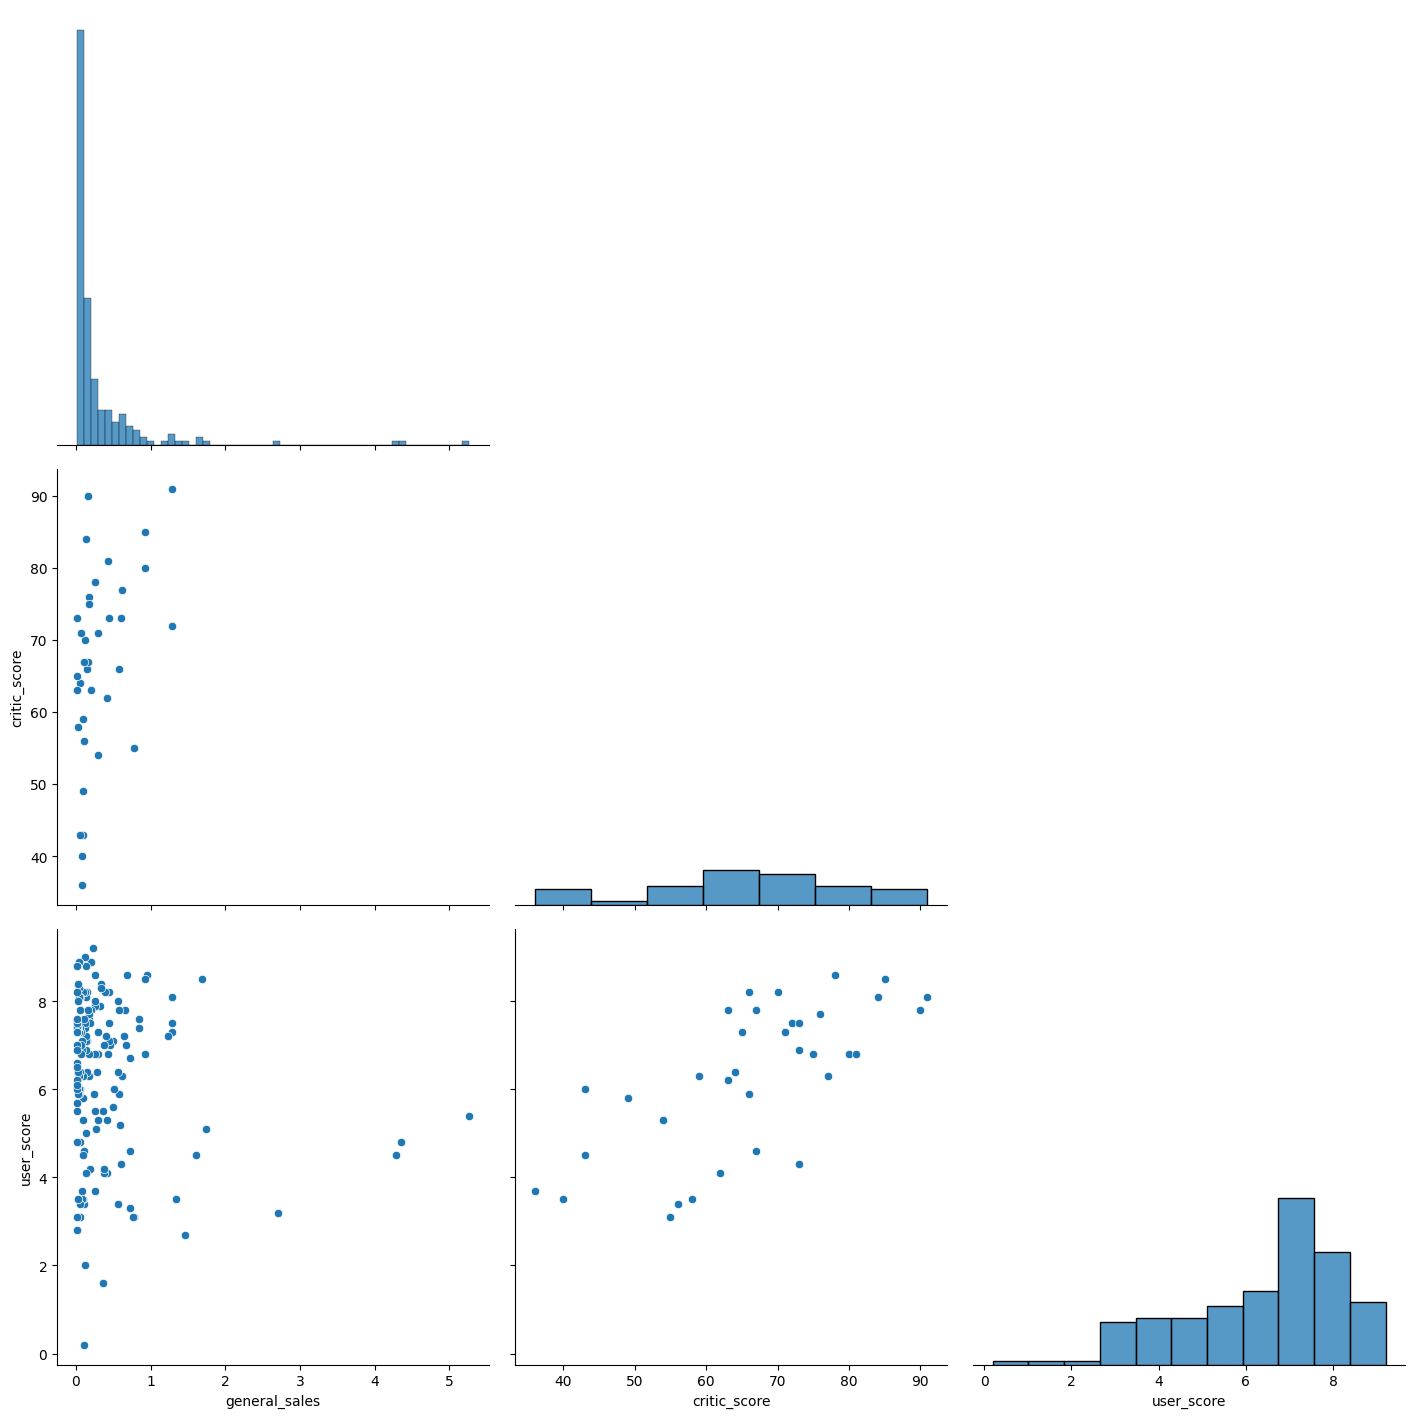

In [56]:
current_period_ps3 = current_period_data[current_period_data['platform'] == 'PS3']
cols_numeric = ['general_sales', 'critic_score', 'user_score']
current_period_ps3 = current_period_ps3[cols_numeric]
g = sns.pairplot(current_period_ps3, corner=True)
g.fig.set_size_inches(15, 15)
current_period_ps3.corr()

Мы видим сильную взаимосвязь оценок критиков на оценки пользователей. Оценка критиков средне влиет на продажи игр, а оценка пользователей, я бы сказал наоборот не влияет на продажи игр. Вероятно это связано с выходом новый игровой платформы от компании Sony.

**PS4**

,general_sales,critic_score,user_score
general_sales,1.000000,0.402661,-0.05792
critic_score,0.402661,1.000000,0.54528
user_score,-0.057920,0.545280,1.00000


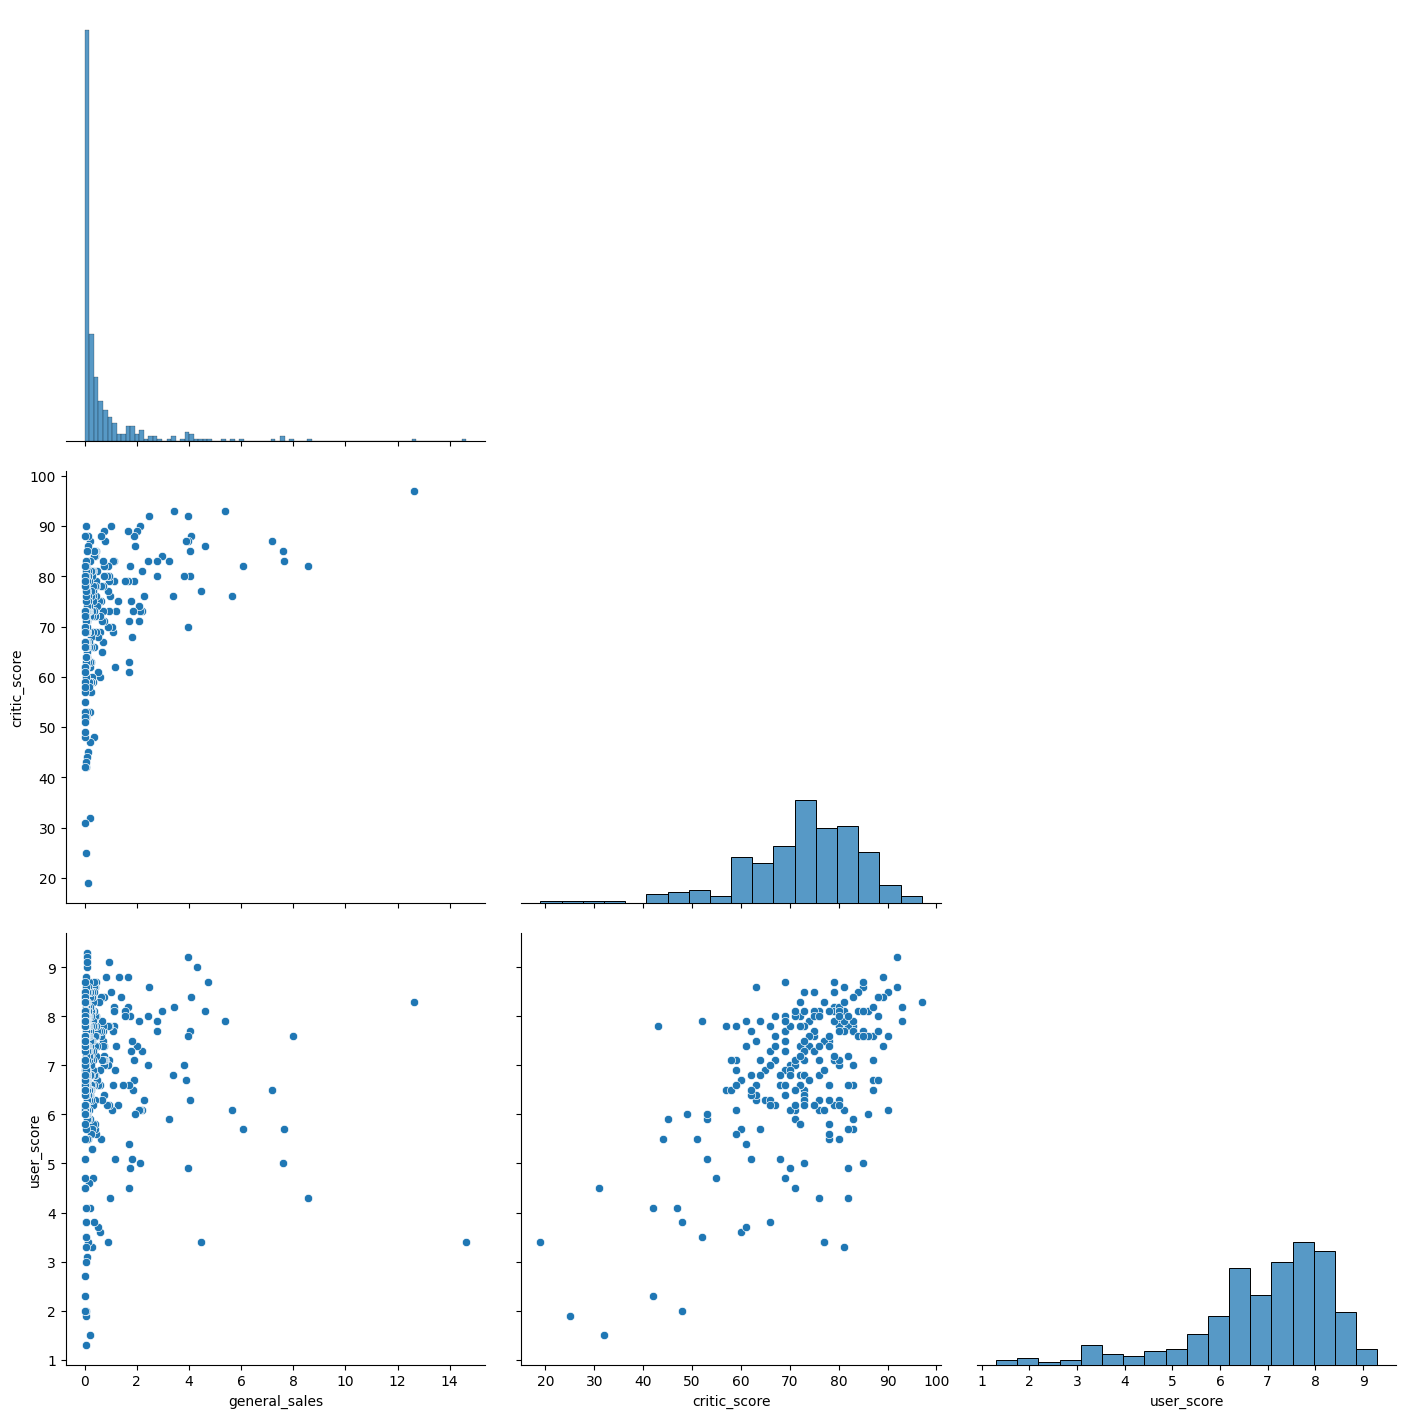

In [57]:
current_period_ps4 = current_period_data[current_period_data['platform'] == 'PS4']
cols_numeric = ['general_sales', 'critic_score', 'user_score']
current_period_ps4 = current_period_ps4[cols_numeric]
g = sns.pairplot(current_period_ps4, corner=True)
g.fig.set_size_inches(15, 15)
current_period_ps4.corr()

На платформе PS4 также видим сильную взаимосвязь оценок пользователей и оценок критиков. Оценки пользователей не сильно влияют на продажи, в то же время как оценки критиков очень сильно влияют на продажи.

**XOne**

,general_sales,critic_score,user_score
general_sales,1.000000,0.428677,-0.001889
critic_score,0.428677,1.000000,0.435669
user_score,-0.001889,0.435669,1.000000


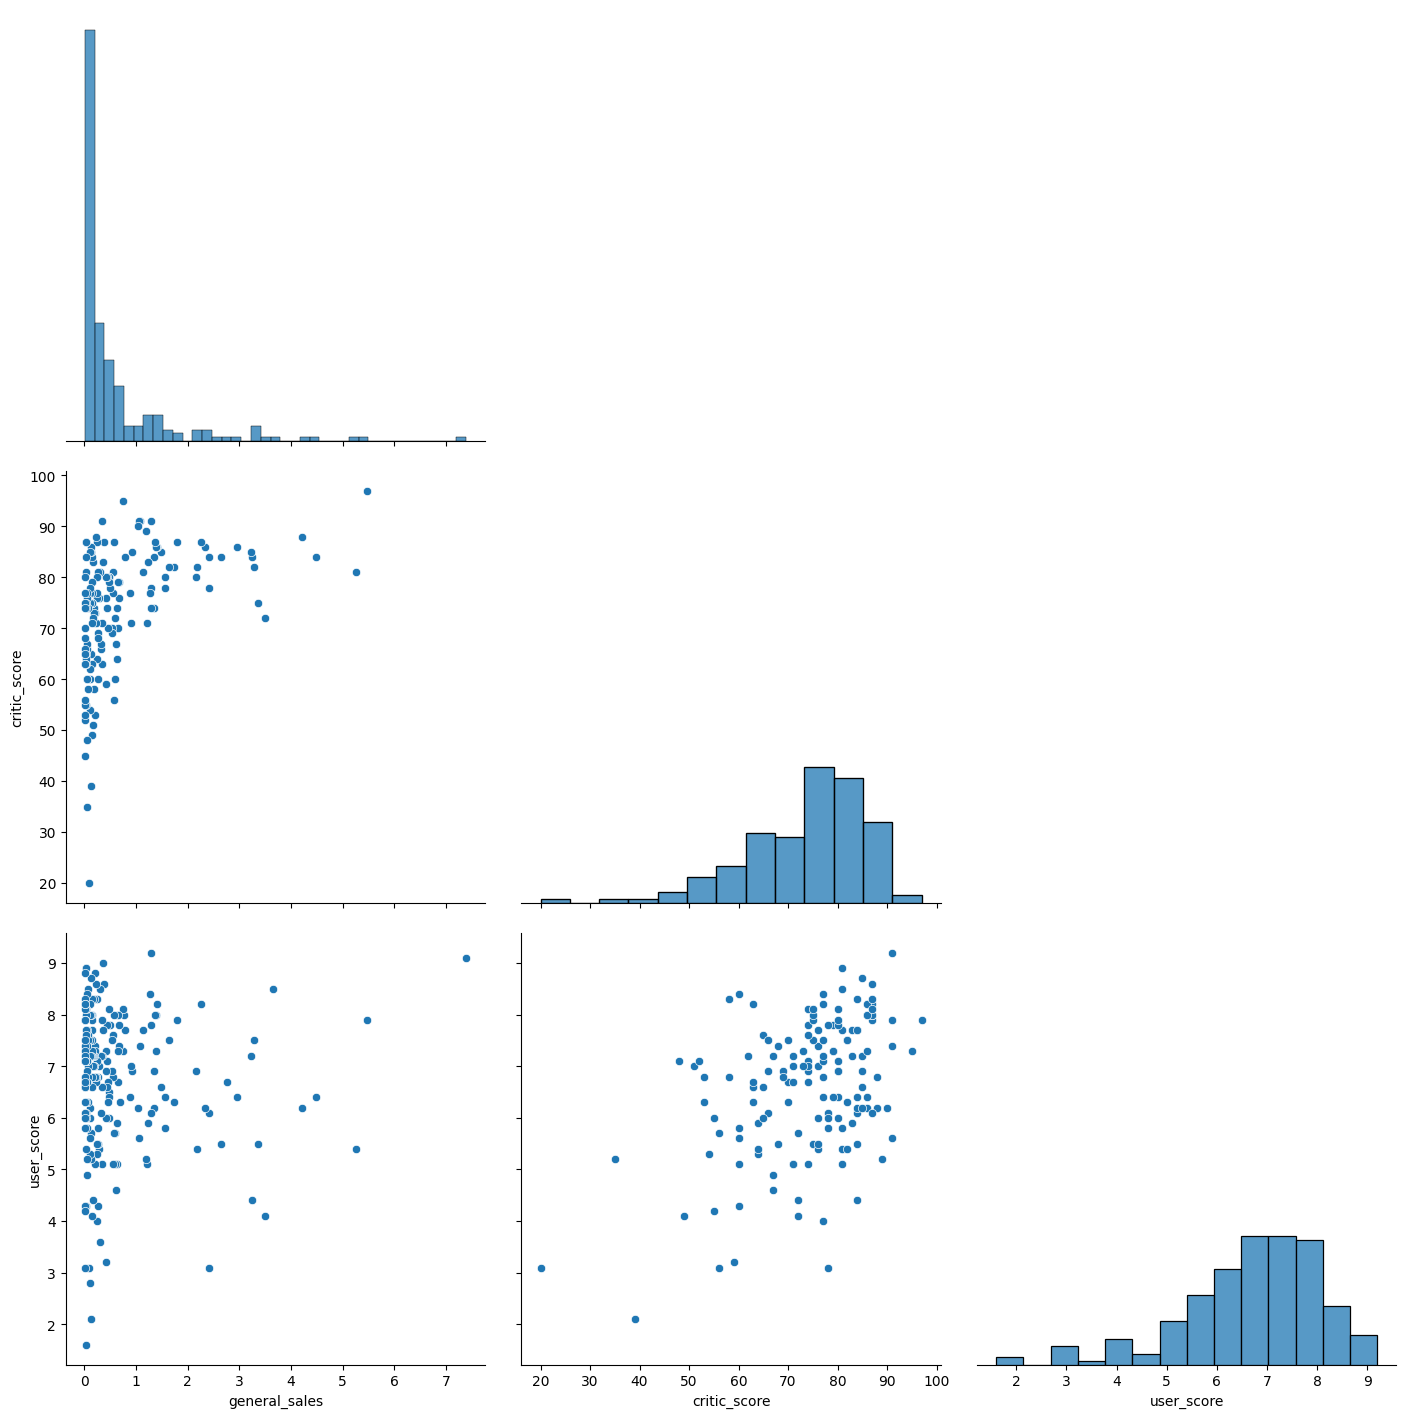

In [58]:
current_period_xone = current_period_data[current_period_data['platform'] == 'XOne']
cols_numeric = ['general_sales', 'critic_score', 'user_score']
current_period_xone = current_period_xone[cols_numeric]
g = sns.pairplot(current_period_xone, corner=True)
g.fig.set_size_inches(15, 15)
current_period_xone.corr()

На платформе XOne также прослеживается взаимосвязь оценок критиков и пользователей, оценки пользователей влияют на продажи лучше чем на платформах фирмы Sony, но также не сказать чтобы сильно. Оценки критиков среднее влияют на продажи.

**3DS**

,general_sales,critic_score,user_score
general_sales,1.000000,0.314117,0.091843
critic_score,0.314117,1.000000,0.862485
user_score,0.091843,0.862485,1.000000


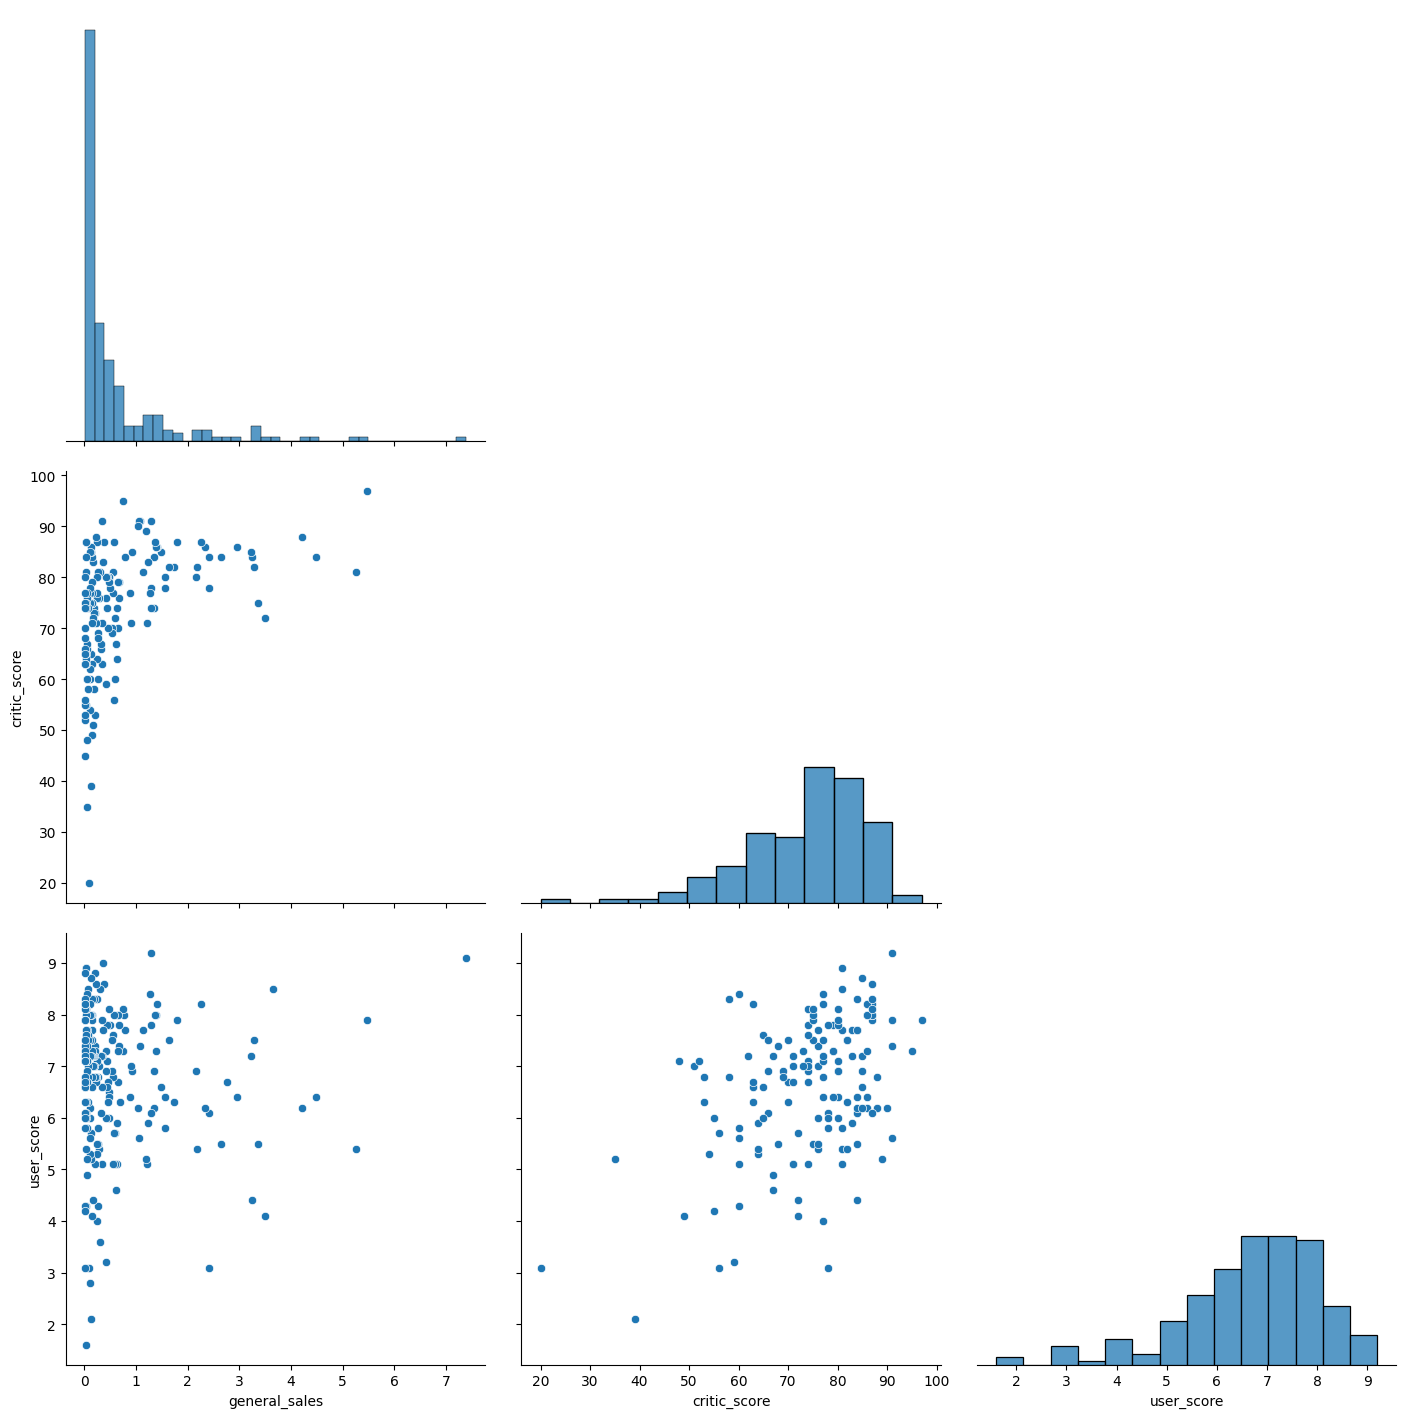

In [59]:
current_period_3DS = current_period_data[current_period_data['platform'] == '3DS']
cols_numeric = ['general_sales', 'critic_score', 'user_score']
current_period_3DS = current_period_3DS[cols_numeric]
g = sns.pairplot(current_period_xone, corner=True)
g.fig.set_size_inches(15, 15)
current_period_3DS.corr()

На платформе 3DS на продажи влияют оценки пользователей, оценки критиков не так сильно влияют на продажи как на других платфомах. Думаю это связано больше с форматом этой игровой платформы.

**Общее распределение игр по жанрам.** 

In [60]:
current_period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,3.4,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,7.8,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,7.6,NaN,7.98


In [61]:
current_period_genre = pd.pivot_table(current_period_data, index='genre', values='general_sales', aggfunc={'general_sales': ['sum', 'mean', 'median']})
display(current_period_genre.sort_values('mean',ascending=False))
display(current_period_genre.sort_values('median',ascending=False))
display(current_period_genre.sort_values('sum',ascending=False))

,mean,median,sum
genre,,,
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Platform,0.476053,0.140,18.09
Fighting,0.470333,0.125,28.22
Role-Playing,0.459005,0.110,101.44
Racing,0.398841,0.090,27.52
Misc,0.332301,0.090,37.55
Action,0.322068,0.090,199.36
Simulation,0.298409,0.100,13.13


,mean,median,sum
genre,,,
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Platform,0.476053,0.140,18.09
Fighting,0.470333,0.125,28.22
Role-Playing,0.459005,0.110,101.44
Simulation,0.298409,0.100,13.13
Action,0.322068,0.090,199.36
Misc,0.332301,0.090,37.55
Racing,0.398841,0.090,27.52


,mean,median,sum
genre,,,
Action,0.322068,0.090,199.36
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Role-Playing,0.459005,0.110,101.44
Misc,0.332301,0.090,37.55
Fighting,0.470333,0.125,28.22
Racing,0.398841,0.090,27.52
Platform,0.476053,0.140,18.09
Adventure,0.094865,0.030,17.55


Самым популярным жанром за актуальный период по средней и медиане является жанр "Shooter", второе место занимает жанр "Sports". В то же время как лидером по продажам является "Action" почти 199 млн. копий. Вторым по популярности является "Shooter", третьим "Sports", и 4 место заняли "Role-Playing".

Аутсайдерами по продажам являются жанры "Strategy" и "Puzzle" вместе едва достигают 6 млн. копий, а по средней и медиане жанр "Adventure"

### Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**NA_sales - продажи в Северной Америке**

In [62]:
current_period_na = current_period_data.query('na_sales > 0')

In [63]:
current_period_na_values = pd.pivot_table(current_period_na, index='platform', values='general_sales', aggfunc='sum')
current_period_na_values = current_period_na_values.sort_values('general_sales',ascending=False)
current_period_na_values

,general_sales
platform,
PS4,281.49
XOne,140.04
3DS,67.13
PS3,61.17
X360,48.02
WiiU,42.35
PC,22.22
PSV,10.76
Wii,4.98


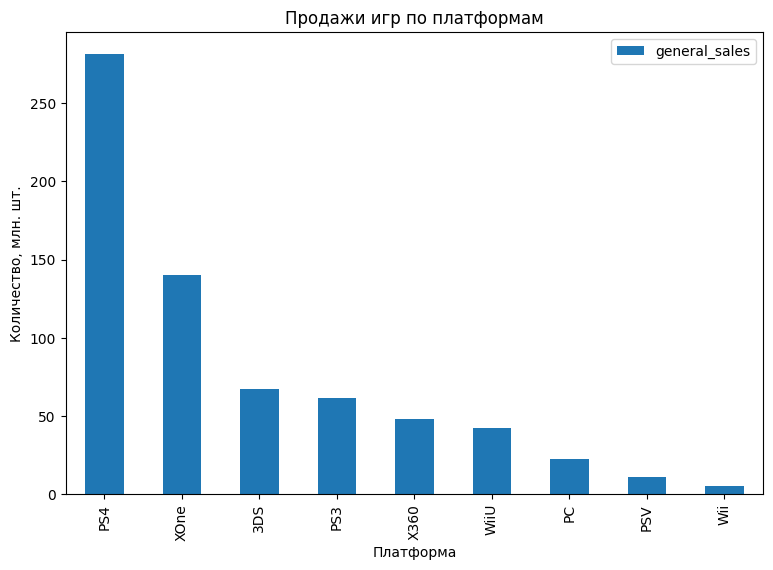

In [64]:
current_period_na_values.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по платформам")
plt.xlabel('Платформа')
plt.ylabel('Количество, млн. шт.')
plt.show()

In [65]:
current_period_genre_na = pd.pivot_table(current_period_na, index='genre', values='general_sales', aggfunc='sum')
current_period_genre_na = current_period_genre_na.sort_values('general_sales',ascending=False)
current_period_genre_na

,general_sales
genre,
Action,178.57
Shooter,170.32
Sports,106.18
Role-Playing,89.07
Misc,34.23
Fighting,26.55
Racing,26.23
Platform,18.04
Adventure,13.77


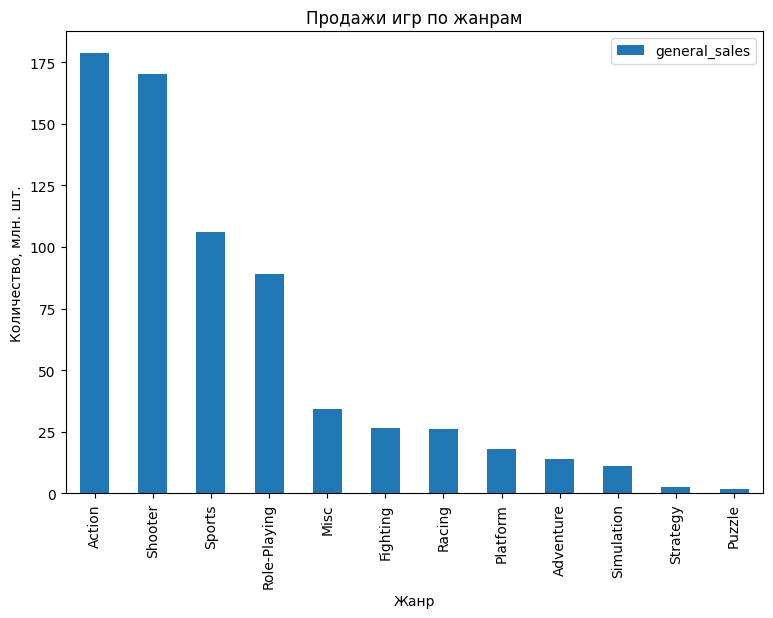

In [66]:
current_period_genre_na.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по жанрам")
plt.xlabel('Жанр')
plt.ylabel('Количество, млн. шт.')
plt.show()

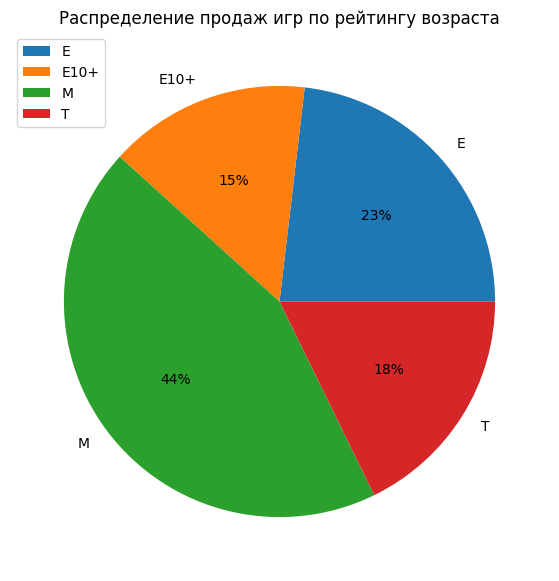

In [67]:
current_period_na.pivot_table(index='rating',values='na_sales',aggfunc='sum') \
  .plot.pie(y='na_sales', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Распределение продаж игр по рейтингу возраста")
plt.show()

На североамериканском рынке лидером по прожам является PS4, второе место занимает XOne. Лидером по жанрам является "Action" и "Shooter". Наибольшие продажи у игр рейтингом "М".

**EU_sales — продажи в Европе**

In [68]:
current_period_eu = current_period_data.query('eu_sales > 0')

In [69]:
current_period_eu_values = pd.pivot_table(current_period_eu, index='platform', values='general_sales', aggfunc='sum')
current_period_eu_values = current_period_eu_values.sort_values('general_sales',ascending=False)
current_period_eu_values

,general_sales
platform,
PS4,280.42
XOne,139.70
3DS,64.21
PS3,60.53
X360,47.50
WiiU,42.21
PC,27.02
PSV,11.76
Wii,5.07


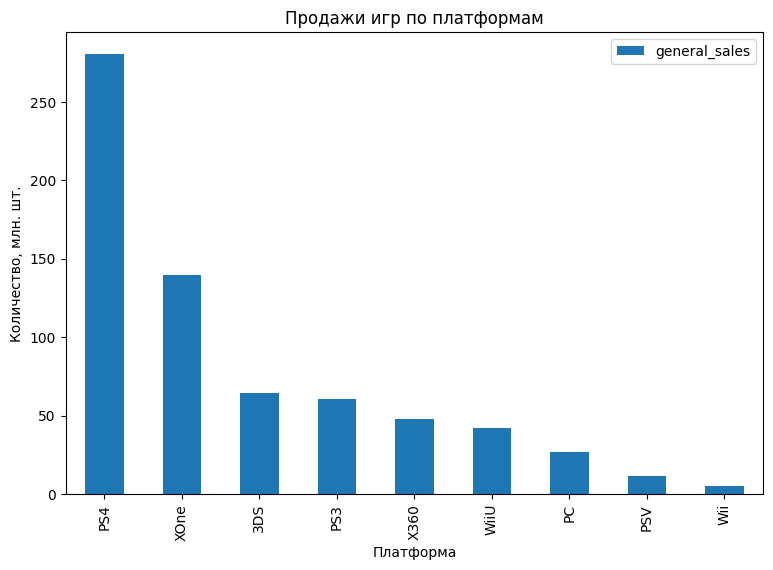

In [70]:
current_period_eu_values.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по платформам")
plt.xlabel('Платформа')
plt.ylabel('Количество, млн. шт.')
plt.show()

In [71]:
current_period_genre_eu = pd.pivot_table(current_period_eu, index='genre', values='general_sales', aggfunc='sum')
current_period_genre_eu = current_period_genre_eu.sort_values('general_sales',ascending=False)
current_period_genre_eu

,general_sales
genre,
Action,178.92
Shooter,170.58
Sports,106.22
Role-Playing,86.09
Misc,34.93
Racing,27.02
Fighting,26.33
Platform,17.50
Adventure,13.65


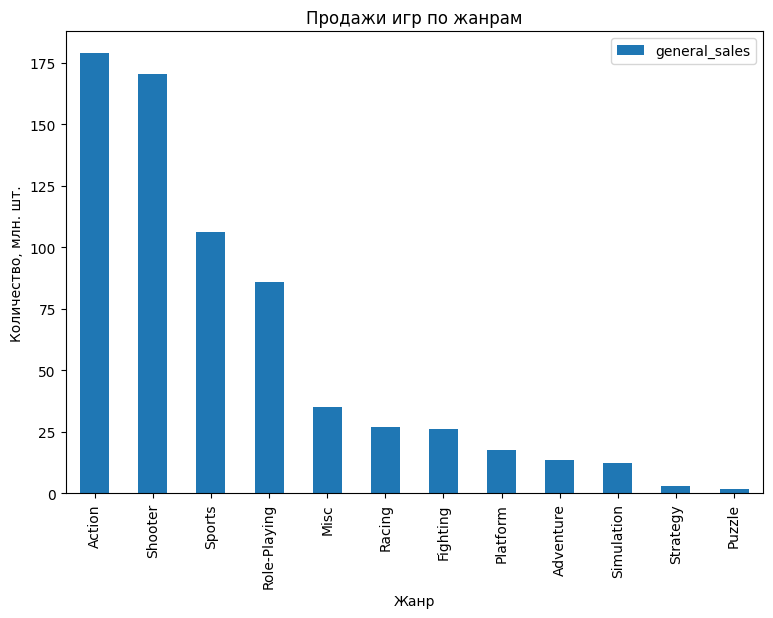

In [72]:
current_period_genre_eu.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по жанрам")
plt.xlabel('Жанр')
plt.ylabel('Количество, млн. шт.')
plt.show()

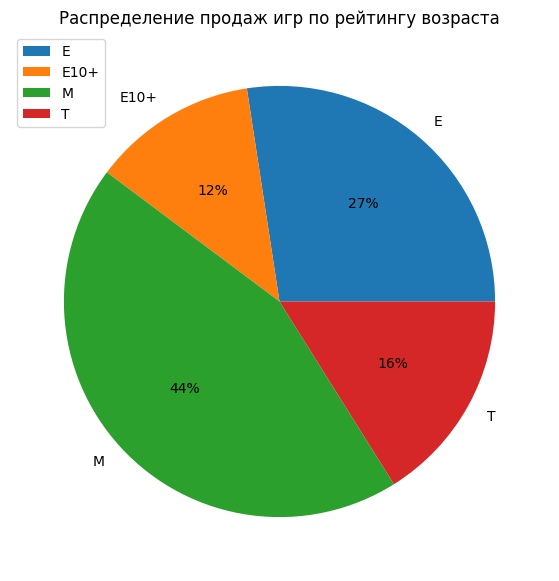

In [73]:
current_period_eu.pivot_table(index='rating',values='eu_sales',aggfunc='sum') \
  .plot.pie(y='eu_sales', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Распределение продаж игр по рейтингу возраста")
plt.show()

На европейском рынке точно такие же предпочтения, как и в Северной Америке. Абсолютный лидер по платформе PS4. Пользователи также предпочтают жанры "Action" и "Shooter". Наибольшие продажи игр у рейтинга "М".

**JP_sales — продажи в Японии**

In [74]:
current_period_jp = current_period_data.query('jp_sales > 0')

In [75]:
current_period_jp_values = pd.pivot_table(current_period_jp, index='platform', values='general_sales', aggfunc='sum')
current_period_jp_values = current_period_jp_values.sort_values('general_sales',ascending=False)
current_period_jp_values

,general_sales
platform,
PS4,242.12
3DS,82.65
PS3,46.10
XOne,44.09
WiiU,36.14
PSV,20.25
X360,5.13
PSP,0.36


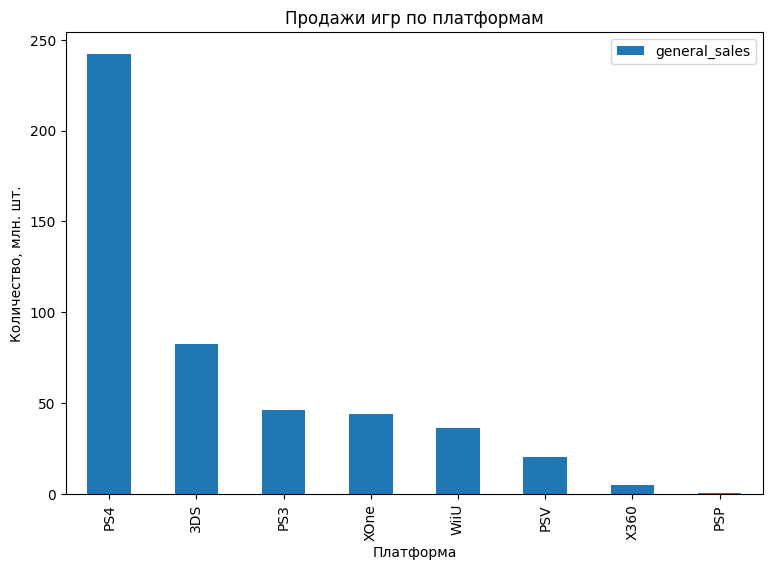

In [76]:
current_period_jp_values.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по платформам")
plt.xlabel('Платформа')
plt.ylabel('Количество, млн. шт.')
plt.show()

In [77]:
current_period_genre_jp = pd.pivot_table(current_period_jp, index='genre', values='general_sales', aggfunc='sum')
current_period_genre_jp = current_period_genre_jp.sort_values('general_sales',ascending=False)
current_period_genre_jp

,general_sales
genre,
Action,127.77
Shooter,124.94
Role-Playing,84.30
Sports,49.42
Fighting,22.16
Racing,20.29
Misc,16.33
Platform,14.89
Adventure,9.02


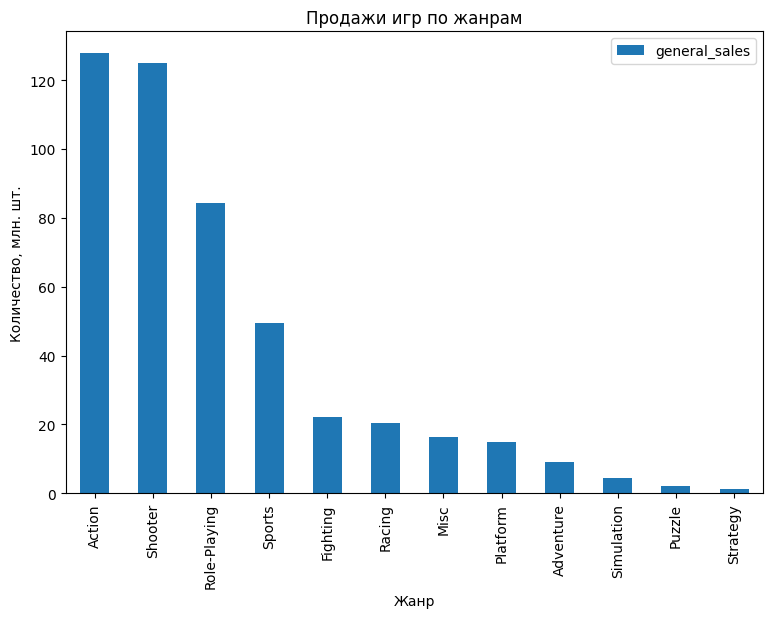

In [78]:
current_period_genre_jp.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по жанрам")
plt.xlabel('Жанр')
plt.ylabel('Количество, млн. шт.')
plt.show()

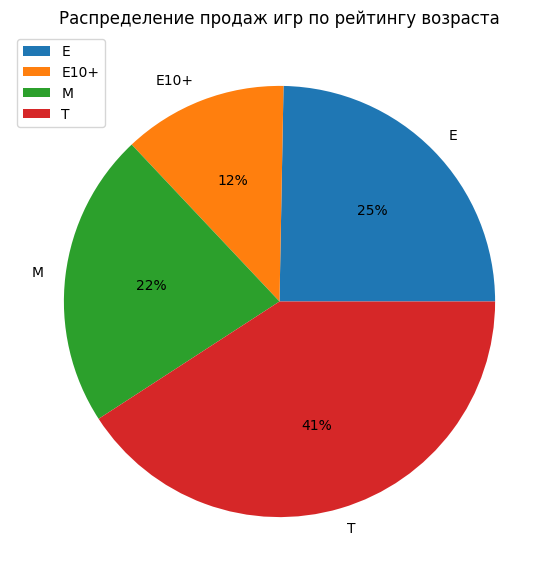

In [79]:
current_period_jp.pivot_table(index='rating',values='jp_sales',aggfunc='sum') \
  .plot.pie(y='jp_sales', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Распределение продаж игр по рейтингу возраста")
plt.show()

Все же японский рынок отличается от Северо-американского и от Европейского рынков. Компании Sony и Nintendo японские, поэтому на рынке преобладают PS4 и 3DS, а также много пользователей PS3. Однако по жанрам, наибольшее предпочтение японские пользователи отдают жанрам "Action" и "Shooter". Наибольшие продажи имеет рейтинг "Т".

**Other_sales — продажи в других странах**

In [80]:
current_period_other = current_period_data.query('other_sales > 0')

In [81]:
current_period_other_values = pd.pivot_table(current_period_other, index='platform', values='general_sales', aggfunc='sum')
current_period_other_values = current_period_other_values.sort_values('general_sales',ascending=False)
current_period_other_values

,general_sales
platform,
PS4,283.55
XOne,138.83
3DS,66.73
PS3,61.64
X360,47.42
WiiU,42.10
PC,24.57
PSV,12.43
Wii,4.98


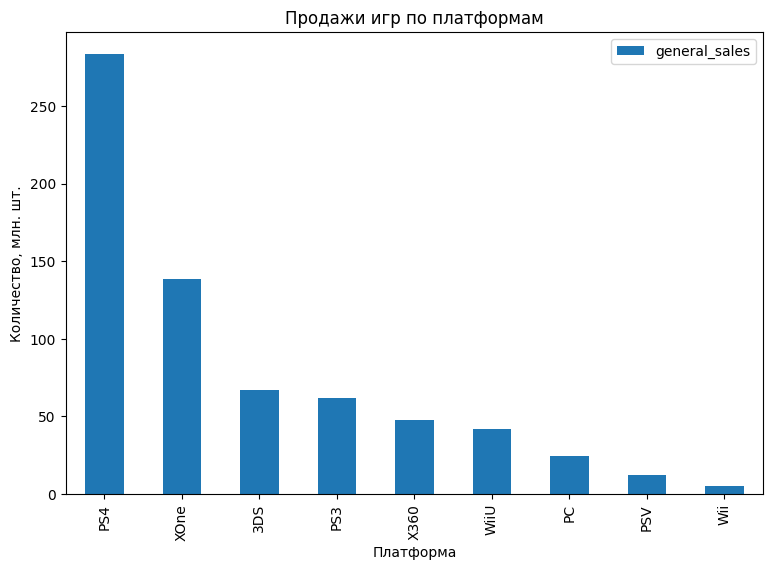

In [82]:
current_period_other_values.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по платформам")
plt.xlabel('Платформа')
plt.ylabel('Количество, млн. шт.')
plt.show()

In [83]:
current_period_genre_other = pd.pivot_table(current_period_other, index='genre', values='general_sales', aggfunc='sum')
current_period_genre_other = current_period_genre_other.sort_values('general_sales',ascending=False)
current_period_genre_other

,general_sales
genre,
Action,178.91
Shooter,170.58
Sports,107.26
Role-Playing,89.29
Misc,33.92
Fighting,27.00
Racing,26.91
Platform,17.85
Adventure,13.78


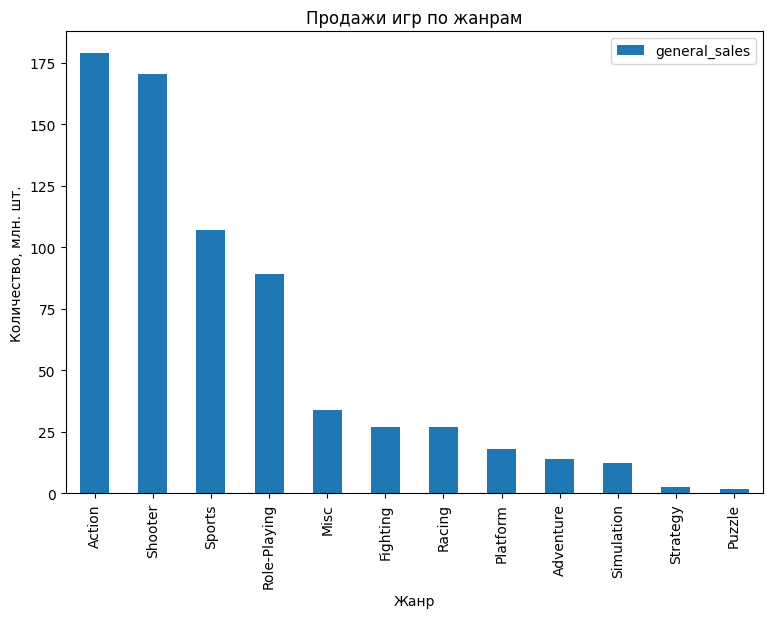

In [84]:
current_period_genre_other.plot(kind='bar', figsize=(9,6))
plt.title("Продажи игр по жанрам")
plt.xlabel('Жанр')
plt.ylabel('Количество, млн. шт.')
plt.show()

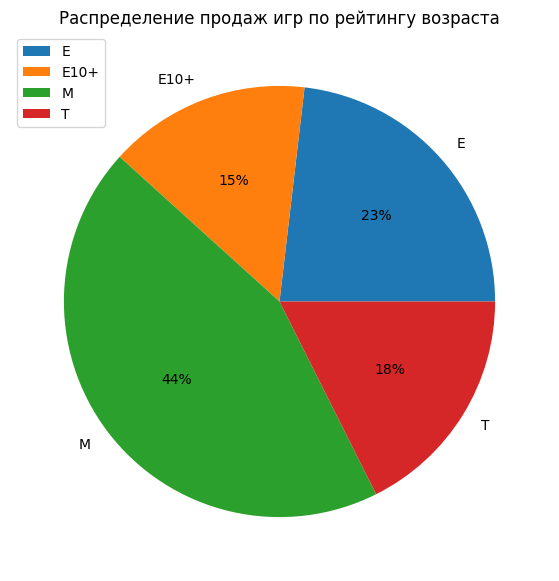

In [85]:
current_period_other.pivot_table(index='rating',values='na_sales',aggfunc='sum') \
  .plot.pie(y='na_sales', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Распределение продаж игр по рейтингу возраста")
plt.show()

У прочих стран предпочтения в платформе PS4 наблюдается с большим отрывом. Наиболее ценятся жанры "Action" и "Shooter". Наибольшие продажи имеет рейтинг "М"

    Во всем мире лидером по продажам является консоль PS4, дале по разному распределяются следующие платформы:
    - XOne
    - PS3
    - 3DS
    - X360 отличие только на японском рынке, там пятое место занимает WiiU.
    По жарам могу сказать следующее:
1. Весь мир любит играть в Action,
1. Shooter находится на 2 месте,
1. Sports на 3 месте по продажам.
1. Также пользователи любят жанр "Role_Playing" он у всех на 4 месте.
1. За пятое место во всем мире предпочитают жанр "Misc", но в Японии, я думаю, люди думают немного по другому и у них 5 место в продажах занимает жанр "Fighting".

    Наибольшие продажи во всем мире имеет рейтинг "М", Японский рынок отличается, здесь наибольшие продажи у рейтинга "Т".

### Проверка гипотез.

**Гипотеза № 1**

*Гипотеза:* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

H_0: Средние пользовательские рейтинги (User_Score) пользователей платформ Xbox One = средним пользовательским рейтингам (User_Score) пользователей платформ PC

H_1: Средние пользовательские рейтинги (User_Score) пользователей платформ Xbox One не равны средним пользовательским рейтингам (User_Score) пользователей платформ PC

Уровень статистической значимости установим 0.05

Для начала выделим данные с пользователями Xbox One и PC.

In [86]:
user_score_xone = current_period_data.query('platform == "XOne"')
user_score_xone = user_score_xone[user_score_xone['user_score'].notna()]
user_score_xone['user_score'].describe()

count    203.000000
mean       6.703448
std        1.384582
min        1.600000
25%        6.000000
50%        6.900000
75%        7.700000
max        9.200000
Name: user_score, dtype: float64

In [87]:
user_score_pc = current_period_data.query('platform == "PC"')
user_score_pc = user_score_pc[user_score_pc['user_score'].notna()]
user_score_pc['user_score'].describe()

count    140.000000
mean       6.407857
std        1.646932
min        1.400000
25%        5.650000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Для проверки гипотезы используем тест Стьюдента.

In [88]:
alpha = 0.05

results = st.ttest_ind(user_score_xone['user_score'], user_score_pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.073179321955908
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть гипотеза от том, что средние пользовательские рейтинги (User_Score) пользователей платформ Xbox One = средним пользовательским рейтингам (User_Score) пользователей платформ PC.

**Гипотеза № 2**

*Гипотеза:* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: Средние пользовательские рейтинги жанра Action (англ. «действие», экшен-игры) = средние пользовательским рейтингам жанра Sports (англ. «спортивные соревнования»).

H_1: Средние пользовательские рейтинги жанра Action (англ. «действие», экшен-игры) != средние пользовательским рейтингам жанра Sports (англ. «спортивные соревнования»).

Уровень статистической значимости установим 0.05

Для начала выделим данные с пользователями жанров Action и Sports. И удалим пропуски.

In [89]:
user_score_action = current_period_data.query('genre == "Action"')
user_score_action = user_score_action[user_score_action['user_score'].notna()]
user_score_action['user_score'].describe()

count    483.000000
mean       6.883023
std        1.425698
min        2.000000
25%        6.400000
50%        7.200000
75%        7.800000
max        9.500000
Name: user_score, dtype: float64

In [90]:
user_score_sports = current_period_data.query('genre == "Sports"')
user_score_sports = user_score_sports[user_score_sports['user_score'].notna()]
user_score_sports['user_score'].describe()

count    144.000000
mean       5.484722
std        1.922386
min        0.200000
25%        4.200000
50%        5.800000
75%        6.900000
max        9.100000
Name: user_score, dtype: float64

In [91]:
alpha = 0.05

results = st.ttest_ind(user_score_action['user_score'], user_score_sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.17458458434726e-20
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Общий вывод.

    На основе анализа данных о продажах в интернет-магазине «Стримчик» можно сделать следующие выводы:
**Общий период продаж игр**    
1. Пропуски в столбцах name и genre думаю образовались только из-за человеческого фактова. В столбцах с оценками critic_score и user_score по причине недостачточного количества оценок пользователей. А в столбце rating вероятно тоже пропуски из-за того, что данный рейтинг был запущен в 1994 году и не все игры прошли оценку ассоциацией Interactive Digital Software Association. Да и сама оценка носит добровольный характер.
2. На мой взгляд до 1994 года выпускалось совсем не много игр, после 1994 года произошел резкий скачок в росте, когда выпускалось каждый год игр больше, чем в предъыдущий практически в 2 раза. Этот скачок продился до 1996 года. Затем произошел не такой сильный рост, он длился до 2000 года. В 2000 году начался бум на релиз новых игр, он длился до 2011 года. Затем произошел спад в выпуске новых игр.
    Думаю это связано с следующим:
     - до 1994 г. не было устройств для игр, и стоили они не дешево, из-за чего многие не могли себе позволить купить себе приставку.
    - В 1995 г. выпустили PS1, что и запустило новую ветку игр.
    - в 2000 году была выпущена PS2, что было прорывом в индустрии игр, а в 2005 году была выпущена X360, что добавило еще ажиотажа в выходе игр.
    - в 2012-2013 годах было закрыто производство PS2 и X360. Думаю это связано с устареванием моделей. Замены конечно выпущены - это PS3 и XOne, а также выход новой игровой консоли PS5.
    - выход игр сейчас стабилизировался, на уровне от 550 до 650 игр в год, думаю это связано с требованием рынка.
3. Выход новых платформ Sony проиходит раз в 6 лет.Выход новой платформы ознаменует скорое прекращение релизов старой модели. Что на мой взгляд логично, т.к. технологии меняются и нет смысла делать новые игры на старые платформы. Продажи новых консолей должны увеличиваться.
4. Выход новых платформ корпорации Microsoft происходлит не так часто как Sony, сначала прошло 5 лет с момента релиза, затем 8. Как выидим X360 была наиболее популярной игровой консолью.

**Актуальный период для прогнозирования новых игр.**
1. На мой взгляд актуальный период для прогнозирования продаж стоит брать с 2013 года. В этот год вышли в продажу новые игровые консоли PS4 и XOne. С учетом приведенных выше графиков, если тенденция продолжится, то эти игровые консоли будут иметь наибольший успех в продажах на ближайшие годы.
2. Лидером по продажам за актуальный период является PS4, 2 место занимает XOne, несмотря на то, что продажи почти в 2 раза меньше чем у PS4. Третье место по продажам за актуальный период занимает Nintendo 3DS. Это портативная консоль, а конкуренты такие как PSP, PSV, WiiU имееют горазды меньшие продажи, поэтому считаю платформу прибыльной. На всех, без исключений, платформах мы видим спад продаж.
3. Оценки критиков и оценки пользователей между собой взаимосвязаны, но при этом не сильно влияют на продажи игр.
4. Во всем мире лидером по продажам является консоль PS4, дале по разному распределяются следующие платформы:
    - XOne
    - PS3
    - 3DS
    - X360 отличие только на японском рынке, там пятое место занимает WiiU.
5. По жарам могу сказать следующее:
    - Весь мир любит играть в Action,
    - Shooter находится на 2 месте,
    - Sports на 3 месте по продажам.
    - Также пользователи любят жанр "Role_Playing" он у всех на 4 месте.
    - За пятое место во всем мире предпочитают жанр "Misc", но в Японии, я думаю, люди думают немного по другому и у них 5 место в продажах занимает жанр "Fighting".
    - Аутсайдерами же являеются жанры "Strategy" и "Puzzle" вместе едва достигают 6 млн. копий.
    - В то же время жанр Shooter находится в лидерах по средним продажам и медиальным.
6. Наибольшие продажи во всем мире имеет рейтинг "М", Японский рынок отличается, здесь наибольшие продажи у рейтинга "Т".

**Проверка гипотез.**
1. Не получилось отвергнуть гипотеза от том, что средние пользовательские рейтинги (User_Score) пользователей платформ Xbox One = средним пользовательским рейтингам (User_Score) пользователей платформ PC.
2. Не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.